#Import necessary libraries

In [ ]:
!pip install gutenbergpy nltk contractions
!pip install accelerate

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from gutenbergpy.textget import get_text_by_id
from textblob import TextBlob
import seaborn as sns
%matplotlib inline

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Initialize stopwords, lemmatizer, and stemmer

In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# Clean and preprocess the text

In [ ]:
# Function to clean and preprocess the text
def preprocess(text):
    # Convert to lowercase
    text = text.lower()
    # Remove garbage characters, punctuation, and non-alphanumeric characters
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize
    words = nltk.word_tokenize(text)
    # Remove stopwords, lemmatize, and stem

    words = [lemmatizer.lemmatize(stemmer.stem(word)) for word in words if word not in stop_words]
    return ' '.join(words)

# Choices of Books

In [ ]:
# Dictionary of book IDs, labels, and authors
books = {
    "The Adventures of Sherlock Holmes": (1661, 'a', 'Arthur Conan Doyle'),
    "The Moonstone": (155, 'b', 'Wilkie Collins'),
    "The Secret Adversary": (1155, 'c', 'Agatha Christie'),
    "The Circular Staircase": (434, 'd', 'Mary Roberts Rinehart'),
    "The Mystery of the Yellow Room": (744, 'e', 'Gaston Leroux')
}


In [ ]:
data = []

In [ ]:
for title, (gutenberg_id, label, author) in books.items():
    raw_text = get_text_by_id(gutenberg_id)
    text = raw_text.decode('utf-8')
    #text = preprocess(text)

    words = text.split()
    chunks = [' '.join(words[i:i + 100]) for i in range(0, len(words), 100)]
    sampled_chunks = random.sample(chunks, min(200, len(chunks)))

    for chunk in sampled_chunks:
        data.append({'author': author,'label': label,'text': chunk })

# Create a DataFrame

In [ ]:
df = pd.DataFrame(data)
print(df.head())

               author label                                               text
0  Arthur Conan Doyle     a  of the details are of interest. The only drawb...
1  Arthur Conan Doyle     a  whispered in my ear, and vouching for things o...
2  Arthur Conan Doyle     a  Mrs. Oakshott to-night, or whether we should r...
3  Arthur Conan Doyle     a  to me. I begged a fortnight’s grace from the c...
4  Arthur Conan Doyle     a  pair of very penetrating dark eyes, which pres...


## Adding a text clean column to the data frame

In [ ]:
df["text_clean"] = df["text"].apply(lambda x: preprocess(x))
df.head()

,author,label,text,text_clean
0,Arthur Conan Doyle,a,of the details are of interest. The only drawb...,detail interest drawback law fear touch scound...
1,Arthur Conan Doyle,a,"whispered in my ear, and vouching for things o...",whisper ear vouch thing knew noth gener assist...
2,Arthur Conan Doyle,a,"Mrs. Oakshott to-night, or whether we should r...",mr oakshott tonight whether reserv tomorrow cl...
3,Arthur Conan Doyle,a,to me. I begged a fortnight’s grace from the c...,beg fortnight grace creditor ask holiday emplo...
4,Arthur Conan Doyle,a,"pair of very penetrating dark eyes, which pres...",pair penetr dark eye present singular contrast...


## Adding sentiment column to the data frame
TextBlob sentiment analysis is a tool that evaluates the sentiment of a piece of text, determining whether it is positive, negative, or neutral.
Score list:

*   -1 (negative)
*   1 (positive)
*   0 (neutral)

It can be useful for understanding the general sentiment of a large amount of text, such as customer reviews or social media posts.

In [ ]:
df["sentiment"] = df["text_clean"].apply(lambda x:
                   TextBlob(x).sentiment.polarity)
df.head()

,author,label,text,text_clean,sentiment
0,Arthur Conan Doyle,a,of the details are of interest. The only drawb...,detail interest drawback law fear touch scound...,0.000000
1,Arthur Conan Doyle,a,"whispered in my ear, and vouching for things o...",whisper ear vouch thing knew noth gener assist...,0.150000
2,Arthur Conan Doyle,a,"Mrs. Oakshott to-night, or whether we should r...",mr oakshott tonight whether reserv tomorrow cl...,0.034375
3,Arthur Conan Doyle,a,to me. I begged a fortnight’s grace from the c...,beg fortnight grace creditor ask holiday emplo...,-0.048333
4,Arthur Conan Doyle,a,"pair of very penetrating dark eyes, which pres...",pair penetr dark eye present singular contrast...,-0.112500


## Display the Mean Sentiment Score of each author

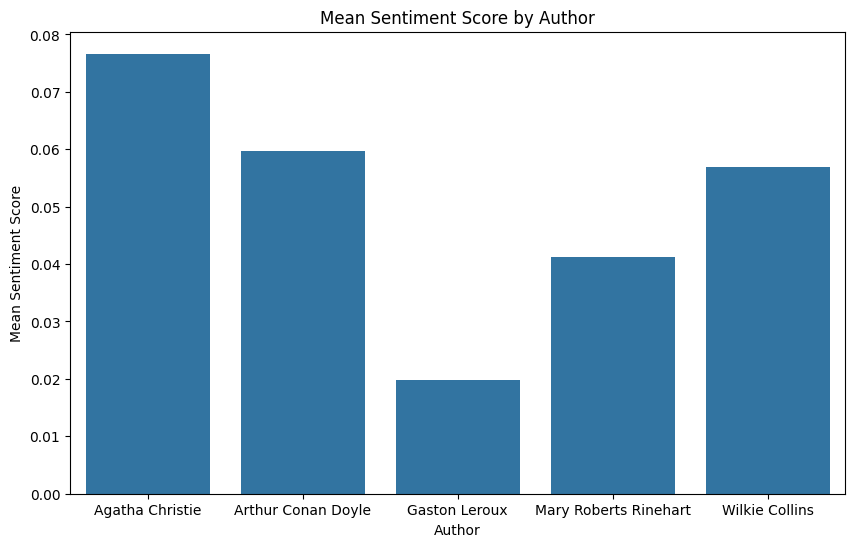

In [ ]:
mean_sentiment = df.groupby('author')['sentiment'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_sentiment.index, y=mean_sentiment.values)
plt.xlabel('Author')
plt.ylabel('Mean Sentiment Score')
plt.title('Mean Sentiment Score by Author')
plt.show()

# Length Analysis before cleaning

In [ ]:
df['word_count'] = df["text"].apply(lambda x: len(str(x).split(" ")))
df['char_count'] = df["text"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
df['sentence_count'] = df["text"].apply(lambda x: len(str(x).split(".")))
df['avg_word_length'] = df['char_count'] / df['word_count']
df['avg_sentence_lenght'] = df['word_count'] / df['sentence_count']
df.head()

,author,label,text,text_clean,sentiment,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght
0,Arthur Conan Doyle,a,of the details are of interest. The only drawb...,detail interest drawback law fear touch scound...,0.000000,100,409,7,4.09,14.285714
1,Arthur Conan Doyle,a,"whispered in my ear, and vouching for things o...",whisper ear vouch thing knew noth gener assist...,0.150000,100,439,4,4.39,25.000000
2,Arthur Conan Doyle,a,"Mrs. Oakshott to-night, or whether we should r...",mr oakshott tonight whether reserv tomorrow cl...,0.034375,100,466,4,4.66,25.000000
3,Arthur Conan Doyle,a,to me. I begged a fortnight’s grace from the c...,beg fortnight grace creditor ask holiday emplo...,-0.048333,100,378,5,3.78,20.000000
4,Arthur Conan Doyle,a,"pair of very penetrating dark eyes, which pres...",pair penetr dark eye present singular contrast...,-0.112500,100,387,4,3.87,25.000000


# Length Analysis After cleaning

In [ ]:
df['word_count'] = df["text_clean"].apply(lambda x: len(str(x).split(" ")))
df['char_count'] = df["text_clean"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
df['sentence_count'] = df["text_clean"].apply(lambda x: len(str(x).split(".")))
df['avg_word_length'] = df['char_count'] / df['word_count']
df['avg_sentence_lenght'] = df['word_count'] / df['sentence_count']
df.head()

,author,label,text,text_clean,sentiment,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght
0,Arthur Conan Doyle,a,of the details are of interest. The only drawb...,detail interest drawback law fear touch scound...,0.000000,39,202,1,5.179487,39.0
1,Arthur Conan Doyle,a,"whispered in my ear, and vouching for things o...",whisper ear vouch thing knew noth gener assist...,0.150000,37,199,1,5.378378,37.0
2,Arthur Conan Doyle,a,"Mrs. Oakshott to-night, or whether we should r...",mr oakshott tonight whether reserv tomorrow cl...,0.034375,46,248,1,5.391304,46.0
3,Arthur Conan Doyle,a,to me. I begged a fortnight’s grace from the c...,beg fortnight grace creditor ask holiday emplo...,-0.048333,43,195,1,4.534884,43.0
4,Arthur Conan Doyle,a,"pair of very penetrating dark eyes, which pres...",pair penetr dark eye present singular contrast...,-0.112500,37,184,1,4.972973,37.0


# `Display words Frequency`

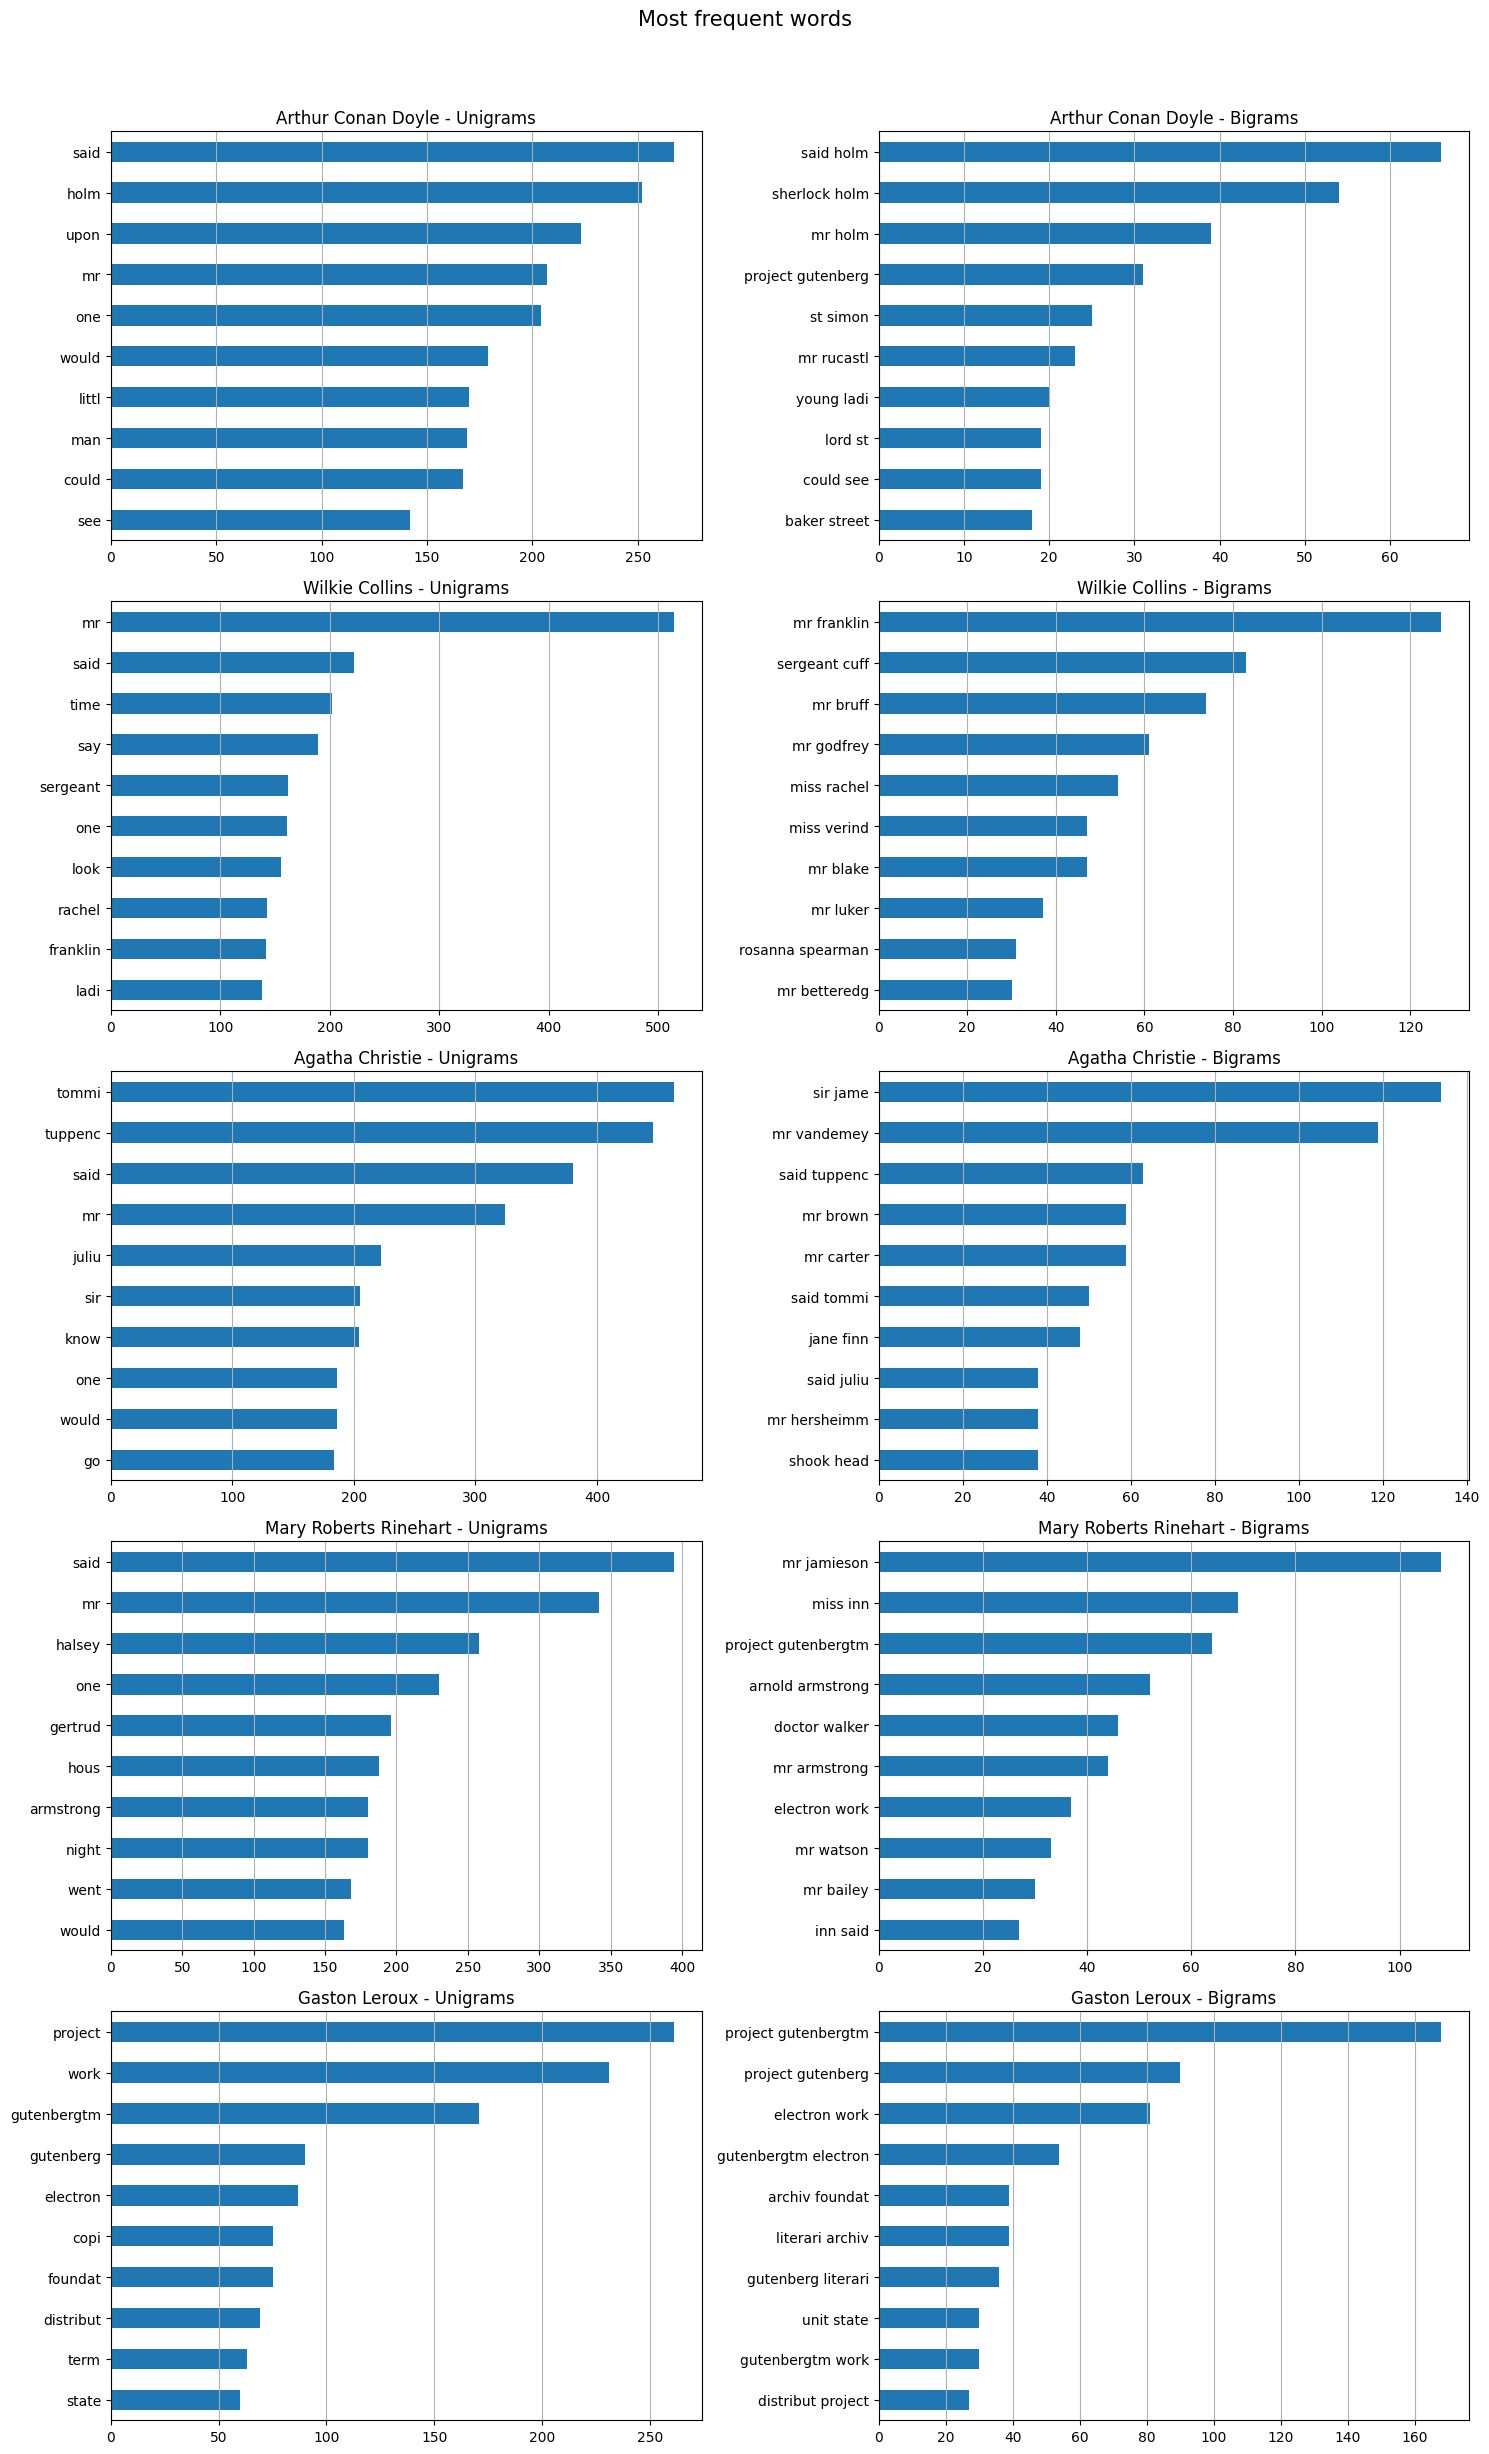

In [ ]:
top=10

## for vectorizer
from sklearn import feature_extraction, manifold
top = 10
fig, axs = plt.subplots(nrows=len(df["author"].unique()), ncols=2, figsize=(15, 5*len(df["author"].unique())))
fig.suptitle("Most frequent words", fontsize=15)

for i, author in enumerate(df["author"].unique()):
    corpus = df[df["author"]==author]["text_clean"]
    lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))

    ## unigrams
    dic_words_freq = nltk.FreqDist(lst_tokens)
    dtf_uni = pd.DataFrame(dic_words_freq.most_common(),
                           columns=["Word","Freq"])
    dtf_uni.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                      kind="barh", title=f"{author} - Unigrams", ax=axs[i][0],
                      legend=False).grid(axis='x')
    axs[i][0].set(ylabel=None)

    ## bigrams
    dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
    dtf_bi = pd.DataFrame(dic_words_freq.most_common(),
                          columns=["Word","Freq"])
    dtf_bi["Word"] = dtf_bi["Word"].apply(lambda x: " ".join(
                       string for string in x) )
    dtf_bi.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                      kind="barh", title=f"{author} - Bigrams", ax=axs[i][1],
                      legend=False).grid(axis='x')
    axs[i][1].set(ylabel=None)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

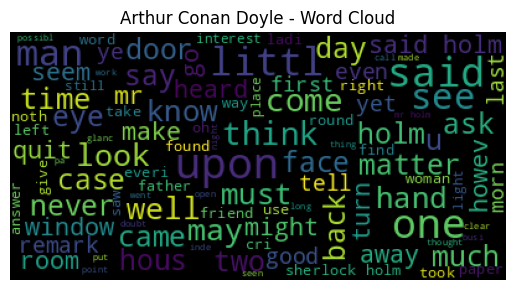

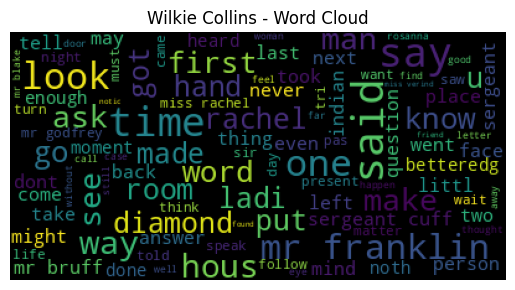

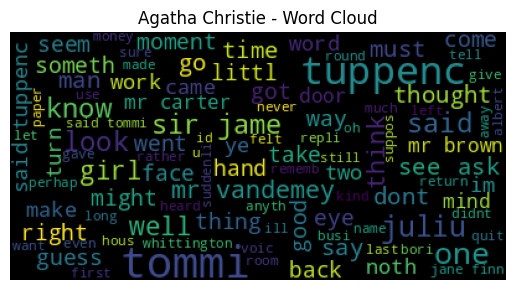

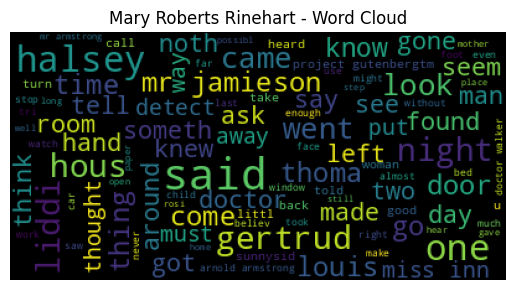

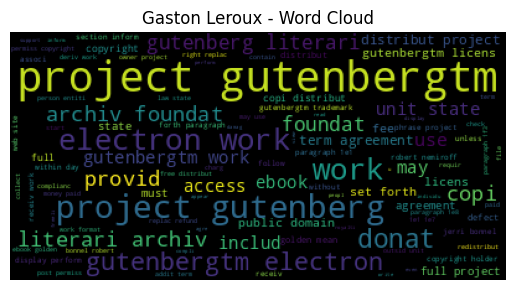

In [ ]:
from wordcloud import WordCloud

for author in df["author"].unique():
    corpus = df[df["author"] == author]["text_clean"]
    wc = WordCloud(background_color='black', max_words=100, max_font_size=35)
    wc = wc.generate(corpus.str.cat(sep=" "))

    fig = plt.figure()
    plt.axis('off')
    plt.imshow(wc, cmap=None)
    plt.title(f"{author} - Word Cloud")
    plt.show()

In [ ]:
# Save the original data to a CSV file
df.to_csv('original_data.csv', index=False)

# Use KFold cross-validation to Split the data into training and testing sets
This will split your data into 10 folds, where each fold contains 90% of the data for training and 10% for testing.

In [ ]:
from sklearn.model_selection import KFold

# Define the number of splits for KFold
n_splits = 10

# Initialize the KFold object
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Iterate over the splits
for train_index, test_index in kf.split(df):
    train_df, test_df = df.iloc[train_index], df.iloc[test_index]
    # Here, you can use train_df and test_df for training and testing your model
    print("Train size:", len(train_df), "Test size:", len(test_df))


Train size: 2581 Test size: 287
Train size: 2581 Test size: 287
Train size: 2581 Test size: 287
Train size: 2581 Test size: 287
Train size: 2581 Test size: 287
Train size: 2581 Test size: 287
Train size: 2581 Test size: 287
Train size: 2581 Test size: 287
Train size: 2582 Test size: 286
Train size: 2582 Test size: 286


In [ ]:
# Save partitioned data to CSV
train_df.to_csv('train_data.csv', index=False)
test_df.to_csv('test_data.csv', index=False)

# Create BoW CountVectorizer
Bag of Words (BoW) is a natural language processing (NLP) strategy for converting a text document into numbers that can be used by a computer program.

In [ ]:
def bowDataSet(train_df, test_df):
    # Create BoW CountVectorizer with English stop words removed
    bow_vectorizer = CountVectorizer(stop_words='english')

    # Fit and transform the training data
    X_train_bow = bow_vectorizer.fit_transform(train_df['text_clean'])

    # Transform the testing data (only transform, no fitting)
    X_test_bow = bow_vectorizer.transform(test_df['text_clean'])

    # Convert BoW matrices to DataFrames
    df_train_bow = pd.DataFrame(X_train_bow.toarray(), columns=bow_vectorizer.get_feature_names_out())
    df_test_bow = pd.DataFrame(X_test_bow.toarray(), columns=bow_vectorizer.get_feature_names_out())

    # Print BoW DataFrame shapes
    print("BoW Training DataFrame shape:", df_train_bow.shape)
    print("BoW Testing DataFrame shape:", df_test_bow.shape)
    bow_vectorizer.vocabulary_.get(u'algorithm')
    return df_train_bow, df_test_bow

# Create TF-IDF vectorizer.
TF-IDF is a natural language processing (NLP) technique that's used to evaluate the importance of different words in a sentence.

In [ ]:
def TFIDFDataSet(train_df, test_df):

  # Create TF-IDF vectorizer with English stop words removed
  tfidf_vectorizer = TfidfVectorizer(stop_words='english')

  # Fit and transform the training data
  X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['text_clean'])

  # Transform the testing data (only transform, no fitting)
  X_test_tfidf = tfidf_vectorizer.transform(test_df['text_clean'])

  # Convert TF-IDF matrices to DataFrames
  df_train_tfidf = pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
  df_test_tfidf = pd.DataFrame(X_test_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

  # Print TF-IDF DataFrame shapes
  print("TF-IDF Training DataFrame shape:", df_train_tfidf.shape)
  print("TF-IDF Testing DataFrame shape:", df_test_tfidf.shape)
  return df_train_tfidf, df_test_tfidf


# N-Grams
N-Grams are words, or combinations of words, broken out by the number of words in that combination. As an outline:

*   Unigram: hi | there | everyone, etc...
*   Bigram: hi there | exploring n-grams | etc...

In [ ]:
def NgramsDataSet(train_df, test_df):

  # N-Grams (unigrams and bigrams) for training data
  ngram_vectorizer = CountVectorizer(ngram_range=(1, 2))
  X_train_ngrams = ngram_vectorizer.fit_transform(train_df['text_clean'])
  X_test_ngrams = ngram_vectorizer.transform(test_df['text_clean'])

  # Getting feature names (including both unigrams and bigrams)
  ngram_features = ngram_vectorizer.get_feature_names_out()

  # Creating DataFrames with the transformed features from the Vectorizer
  df_train_ngrams = pd.DataFrame(X_train_ngrams.toarray(), columns=ngram_features, index=train_df.index)
  df_test_ngrams = pd.DataFrame(X_test_ngrams.toarray(), columns=ngram_features, index=test_df.index)

  print("Shape of X_train_ngrams:", X_train_ngrams.shape)
  print("Shape of X_test_ngrams:", X_test_ngrams.shape)
  return X_train_ngrams, X_test_ngrams



# Training

In [ ]:
# import necessary libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# Dictionary to store the results
results = {}

In [ ]:
def generateAveragePlot(results_df,PlotTitle):
    # Calculate the average values for each column
    averages = results_df.mean()

    # Create a new DataFrame to store the averages
    averages_df = pd.DataFrame(averages, columns=['Average'])

    # Print the DataFrame containing the average values
    print(averages_df)
    # Multiply the average values by 100 to convert them to percentages
    averages_df_percentage = averages_df * 100

    # Define colors for the bars
    colors = sns.color_palette('Set2', len(averages_df_percentage))

    # Plotting the average values as percentages with colors and annotations
    plt.figure(figsize=(10, 6))
    bar_plot = sns.barplot(x=averages_df_percentage.index, y='Average', data=averages_df_percentage, palette=colors)
    plt.title(PlotTitle + ' - Average Precision, Recall, and F1-score (Percentage)')
    plt.xlabel('Metrics')
    plt.ylabel('Average Value (%)')
    plt.ylim(0, 100)  # Set y-axis limit to 0-100 for percentages
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines for clarity

    # Annotate bars with percentage values
    for p in bar_plot.patches:
        bar_plot.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                          ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                          textcoords='offset points')

    plt.tight_layout()

    # Show the plot
    plt.show()

## Evaluate the classifier
*   Accuracy: This indicates that the classifier correctly predicted the labels of approximately X% of the instances in the test set.
*       Precision: The ratio of correctly predicted positive observations to the total predicted positives. High precision means that the classifier made few false positive errors.
*       Recall: The ratio of correctly predicted positive observations to all observations in the actual class. High recall means that the classifier made few false negative errors.
*       F1-score: The weighted average of precision and recall. It is useful when you need a balance between precision and recall.
*       upport: The number of actual occurrences of the class in the dataset.

## Naive Bayes (NB)

In [ ]:
nb_classifier = MultinomialNB()

### Classification Training Naive Bayes (NB) for bow

---



#### Evaluate the bow classifier

In [ ]:
accuracy_scores = []
classification_reports = []
confusion_matrices = []
for train_index, test_index in kf.split(df):
    train_df, test_df = df.iloc[train_index], df.iloc[test_index]
    df_train_bow, df_test_bow = bowDataSet(train_df, test_df)

    # Initialize and fit the Naive Bayes classifier
    nb_classifier.fit(df_train_bow, train_df['label'])

    # Predict on the test data
    y_pred_bow = nb_classifier.predict(df_test_bow)

    # Calculate accuracy
    accuracy_NB_BOW = accuracy_score(test_df['label'], y_pred_bow)
    accuracy_scores.append(accuracy_NB_BOW)
    #print("Accuracy:", accuracy_NB_BOW)

    # Store the classification report
    classification_rep = classification_report(test_df['label'], y_pred_bow, output_dict=True)
    classification_reports.append(classification_rep)

    # Store the confusion matrix
    conf_matrix = confusion_matrix(test_df['label'], y_pred_bow)
    confusion_matrices.append(conf_matrix)

# Calculate mean accuracy and round it
mean_accuracy = np.mean(accuracy_scores)
mean_accuracy_rounded = round(mean_accuracy, 2)
print("Mean Accuracy:", mean_accuracy_rounded)

# Calculate mean classification report and round metrics
mean_classification_report = {}
for cls in classification_reports[0].keys():
    if cls not in ['accuracy', 'macro avg', 'weighted avg']:
        precision = np.mean([report[cls]['precision'] for report in classification_reports])
        recall = np.mean([report[cls]['recall'] for report in classification_reports])
        f1_score = np.mean([report[cls]['f1-score'] for report in classification_reports])
        mean_classification_report[cls] = {
            'Precision': round(precision, 2),
            'Recall': round(recall, 2),
            'F1-score': round(f1_score, 2)
        }
mean_classification_report_df = pd.DataFrame.from_dict(mean_classification_report, orient='index')


print("\nMean Naive Bayes Classification Report for BoW:\n", mean_classification_report_df)

# Calculate mean confusion matrix and round it
mean_confusion_matrix = np.mean(confusion_matrices, axis=0)
mean_confusion_matrix_rounded = np.round(mean_confusion_matrix).astype(int)
print("\nMean Confusion Matrix:\n", mean_confusion_matrix_rounded)

BoW Training DataFrame shape: (1720, 19896)
BoW Testing DataFrame shape: (192, 19896)
BoW Training DataFrame shape: (1720, 20141)
BoW Testing DataFrame shape: (192, 20141)
BoW Training DataFrame shape: (1721, 19924)
BoW Testing DataFrame shape: (191, 19924)
BoW Training DataFrame shape: (1721, 20036)
BoW Testing DataFrame shape: (191, 20036)
BoW Training DataFrame shape: (1721, 20037)
BoW Testing DataFrame shape: (191, 20037)
BoW Training DataFrame shape: (1721, 20085)
BoW Testing DataFrame shape: (191, 20085)
BoW Training DataFrame shape: (1721, 19898)
BoW Testing DataFrame shape: (191, 19898)
BoW Training DataFrame shape: (1721, 20176)
BoW Testing DataFrame shape: (191, 20176)
BoW Training DataFrame shape: (1721, 20065)
BoW Testing DataFrame shape: (191, 20065)
BoW Training DataFrame shape: (1721, 19885)
BoW Testing DataFrame shape: (191, 19885)
Mean Accuracy: 0.93

Mean Naive Bayes Classification Report for BoW:
    Precision  Recall  F1-score
a       0.94    0.91      0.93
b       

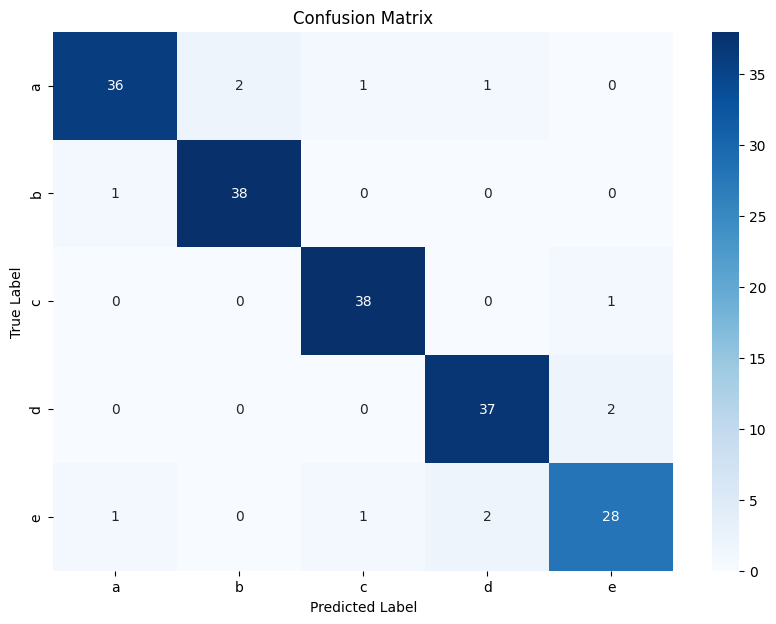


Misclassification Rates:
True: a, Predicted: b -> Rate: 0.00
True: a, Predicted: c -> Rate: 0.04
True: a, Predicted: d -> Rate: 0.00
True: a, Predicted: e -> Rate: 0.00
True: b, Predicted: a -> Rate: 0.03
True: b, Predicted: c -> Rate: 0.03
True: b, Predicted: d -> Rate: 0.00
True: b, Predicted: e -> Rate: 0.00
True: c, Predicted: a -> Rate: 0.00
True: c, Predicted: b -> Rate: 0.00
True: c, Predicted: d -> Rate: 0.00
True: c, Predicted: e -> Rate: 0.05
True: d, Predicted: a -> Rate: 0.02
True: d, Predicted: b -> Rate: 0.00
True: d, Predicted: c -> Rate: 0.02
True: d, Predicted: e -> Rate: 0.02
True: e, Predicted: a -> Rate: 0.00
True: e, Predicted: b -> Rate: 0.16
True: e, Predicted: c -> Rate: 0.00
True: e, Predicted: d -> Rate: 0.08


In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(mean_confusion_matrix_rounded, annot=True, fmt='d', cmap='Blues', xticklabels=train_df['label'].unique(), yticklabels=train_df['label'].unique())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
# Quantitative Analysis: Calculate misclassification rates
misclassifications = {}
labels =['a','b','c','d','e']
for i, true_label in enumerate(labels):
    for j, pred_label in enumerate(labels):
        if i != j:
            misclassifications[(true_label, pred_label)] = conf_matrix[i, j] / conf_matrix[i].sum()

# Print misclassification rates
print("\nMisclassification Rates:")
for (true_label, pred_label), rate in misclassifications.items():
    print(f"True: {true_label}, Predicted: {pred_label} -> Rate: {rate:.2f}")

           Average
Precision     0.93
Recall        0.93
F1-score      0.93


<ipython-input-177-490111ec79fc>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=averages_df_percentage.index, y='Average', data=averages_df_percentage, palette=colors)


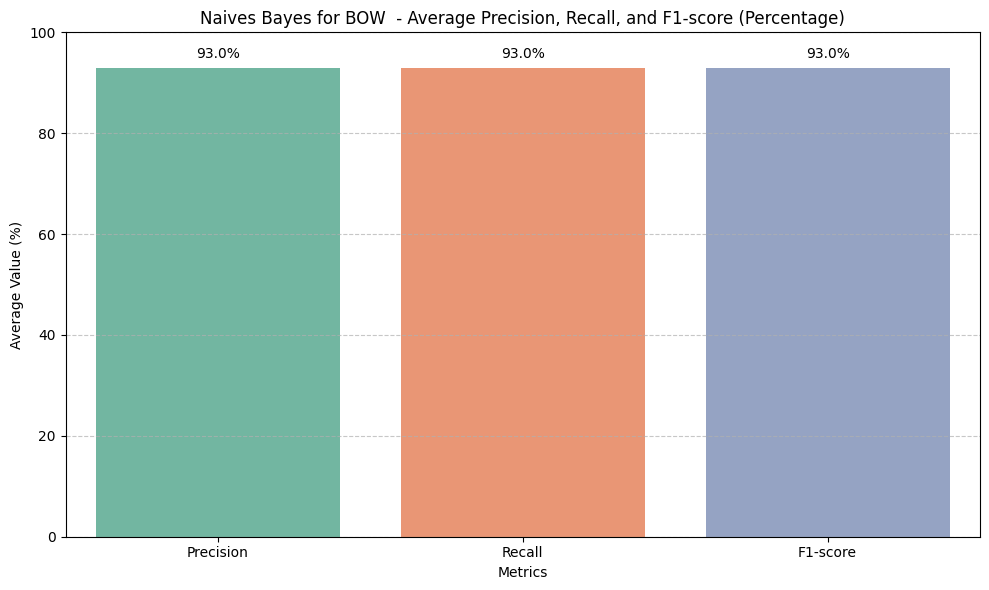

In [ ]:
generateAveragePlot(mean_classification_report_df,"Naives Bayes for BOW ")

### Classification Training Naive Bayes (NB) for TF-IDF

#### Evaluate the TF-IDF classifier

In [ ]:
accuracy_scores = []
classification_reports = []
confusion_matrices = []
for train_index, test_index in kf.split(df):
    train_df, test_df = df.iloc[train_index], df.iloc[test_index]
    X_train_tfidf, X_test_tfidf = TFIDFDataSet(train_df, test_df)

    # Initialize and fit the Naive Bayes classifier
    nb_classifier.fit(X_train_tfidf, train_df['label'])

    # Predict on the test data
    y_pred_tfidf = nb_classifier.predict(X_test_tfidf)

    # Calculate accuracy
    accuracy_NB_TFIDF = accuracy_score(test_df['label'], y_pred_tfidf)
    accuracy_scores.append(accuracy_NB_TFIDF)

    ## Store the classification report
    classification_rep = classification_report(test_df['label'], y_pred_tfidf, output_dict=True)
    classification_reports.append(classification_rep)

    # Store the confusion matrix
    conf_matrix = confusion_matrix(test_df['label'], y_pred_tfidf)
    confusion_matrices.append(conf_matrix)


# Calculate mean accuracy and round it
mean_accuracy = np.mean(accuracy_scores)
mean_accuracy_rounded = round(mean_accuracy, 2)
print("Mean Accuracy:", mean_accuracy_rounded)

# Calculate mean classification report and round metrics
mean_classification_report = {}
for cls in classification_reports[0].keys():
    if cls not in ['accuracy', 'macro avg', 'weighted avg']:
        precision = np.mean([report[cls]['precision'] for report in classification_reports])
        recall = np.mean([report[cls]['recall'] for report in classification_reports])
        f1_score = np.mean([report[cls]['f1-score'] for report in classification_reports])
        mean_classification_report[cls] = {
            'Precision': round(precision, 2),
            'Recall': round(recall, 2),
            'F1-score': round(f1_score, 2)
        }
results2_df = pd.DataFrame.from_dict(mean_classification_report, orient='index')
print("\nMean Naive Bayes Classification Report for TFIDF:\n", results2_df)

# Calculate mean confusion matrix and round it
mean_confusion_matrix = np.mean(confusion_matrices, axis=0)
mean_confusion_matrix_rounded = np.round(mean_confusion_matrix).astype(int)
print("\nMean Confusion Matrix:\n", mean_confusion_matrix_rounded)

TF-IDF Training DataFrame shape: (1720, 19896)
TF-IDF Testing DataFrame shape: (192, 19896)
TF-IDF Training DataFrame shape: (1720, 20141)
TF-IDF Testing DataFrame shape: (192, 20141)
TF-IDF Training DataFrame shape: (1721, 19924)
TF-IDF Testing DataFrame shape: (191, 19924)
TF-IDF Training DataFrame shape: (1721, 20036)
TF-IDF Testing DataFrame shape: (191, 20036)
TF-IDF Training DataFrame shape: (1721, 20037)
TF-IDF Testing DataFrame shape: (191, 20037)
TF-IDF Training DataFrame shape: (1721, 20085)
TF-IDF Testing DataFrame shape: (191, 20085)
TF-IDF Training DataFrame shape: (1721, 19898)
TF-IDF Testing DataFrame shape: (191, 19898)
TF-IDF Training DataFrame shape: (1721, 20176)
TF-IDF Testing DataFrame shape: (191, 20176)
TF-IDF Training DataFrame shape: (1721, 20065)
TF-IDF Testing DataFrame shape: (191, 20065)
TF-IDF Training DataFrame shape: (1721, 19885)
TF-IDF Testing DataFrame shape: (191, 19885)
Mean Accuracy: 0.93

Mean Naive Bayes Classification Report for TFIDF:
    Preci

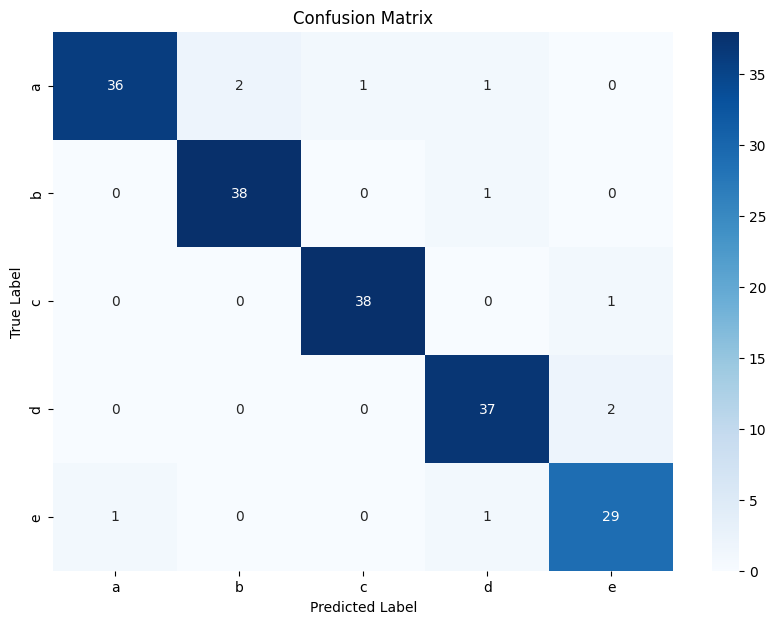


Misclassification Rates:
True: a, Predicted: b -> Rate: 0.07
True: a, Predicted: c -> Rate: 0.04
True: a, Predicted: d -> Rate: 0.02
True: a, Predicted: e -> Rate: 0.00
True: b, Predicted: a -> Rate: 0.03
True: b, Predicted: c -> Rate: 0.00
True: b, Predicted: d -> Rate: 0.00
True: b, Predicted: e -> Rate: 0.00
True: c, Predicted: a -> Rate: 0.00
True: c, Predicted: b -> Rate: 0.00
True: c, Predicted: d -> Rate: 0.00
True: c, Predicted: e -> Rate: 0.05
True: d, Predicted: a -> Rate: 0.02
True: d, Predicted: b -> Rate: 0.00
True: d, Predicted: c -> Rate: 0.02
True: d, Predicted: e -> Rate: 0.05
True: e, Predicted: a -> Rate: 0.00
True: e, Predicted: b -> Rate: 0.16
True: e, Predicted: c -> Rate: 0.00
True: e, Predicted: d -> Rate: 0.00


In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(mean_confusion_matrix_rounded, annot=True, fmt='d', cmap='Blues', xticklabels=train_df['label'].unique(), yticklabels=train_df['label'].unique())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
# Quantitative Analysis: Calculate misclassification rates
misclassifications = {}
labels =['a','b','c','d','e']
for i, true_label in enumerate(labels):
    for j, pred_label in enumerate(labels):
        if i != j:
            misclassifications[(true_label, pred_label)] = conf_matrix[i, j] / conf_matrix[i].sum()

# Print misclassification rates
print("\nMisclassification Rates:")
for (true_label, pred_label), rate in misclassifications.items():
    print(f"True: {true_label}, Predicted: {pred_label} -> Rate: {rate:.2f}")

           Average
Precision    0.930
Recall       0.936
F1-score     0.932


<ipython-input-177-490111ec79fc>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=averages_df_percentage.index, y='Average', data=averages_df_percentage, palette=colors)


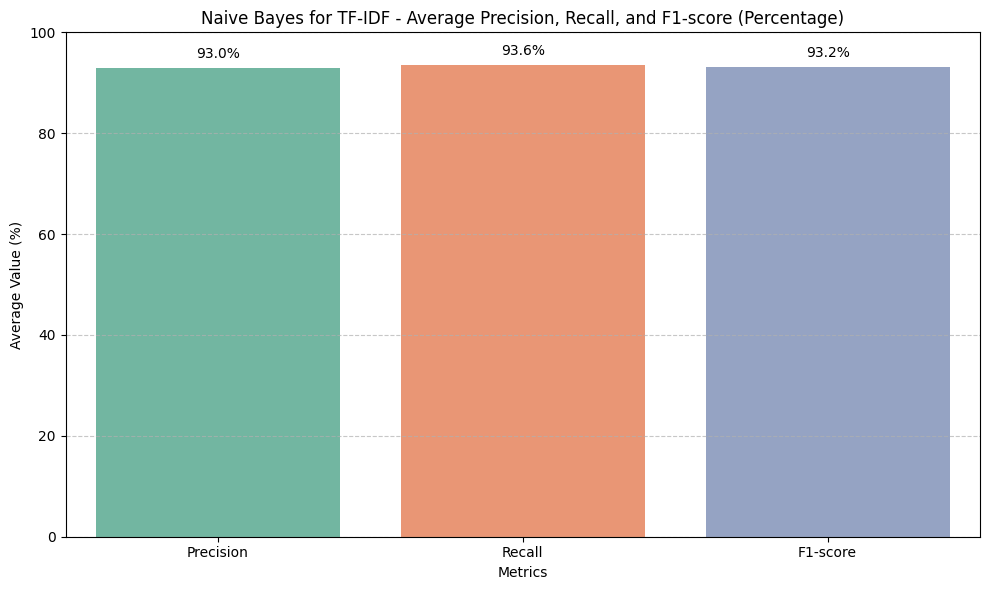

In [ ]:
generateAveragePlot(results2_df,"Naive Bayes for TF-IDF")

### Classification Training Naive Bayes for N-grams

#### Evaluate the N-grams classifier


In [ ]:
accuracy_scores = []
classification_reports = []
confusion_matrices = []
for train_index, test_index in kf.split(df):
    train_df, test_df = df.iloc[train_index], df.iloc[test_index]
    X_train_ngrams, X_test_ngrams = NgramsDataSet(train_df, test_df)

    # Initialize and fit the Naive Bayes classifier
    nb_classifier.fit(X_train_ngrams, train_df['label'])

    # Predict on the test data
    y_pred_ngrams = nb_classifier.predict(X_test_ngrams)

    # Calculate accuracy
    accuracy_NB_ngrams = accuracy_score(test_df['label'], y_pred_ngrams)
    accuracy_scores.append(accuracy_NB_ngrams)


    ## Store the classification report
    classification_rep = classification_report(test_df['label'], y_pred_ngrams, output_dict=True)
    classification_reports.append(classification_rep)

    # Store the confusion matrix
    conf_matrix = confusion_matrix(test_df['label'], y_pred_ngrams)
    confusion_matrices.append(conf_matrix)

# Calculate mean accuracy and round it
mean_accuracy = np.mean(accuracy_scores)
mean_accuracy_rounded = round(mean_accuracy, 2)
print("Mean Accuracy:", mean_accuracy_rounded)

# Calculate mean classification report and round metrics
mean_classification_report = {}
for cls in classification_reports[0].keys():
    if cls not in ['accuracy', 'macro avg', 'weighted avg']:
        precision = np.mean([report[cls]['precision'] for report in classification_reports])
        recall = np.mean([report[cls]['recall'] for report in classification_reports])
        f1_score = np.mean([report[cls]['f1-score'] for report in classification_reports])
        mean_classification_report[cls] = {
            'Precision': round(precision, 2),
            'Recall': round(recall, 2),
            'F1-score': round(f1_score, 2)
        }
results3_df = pd.DataFrame.from_dict(mean_classification_report, orient='index')
print("\nMean Naive Bayes Classification Report for N-grams:\n", results3_df)

# Calculate mean confusion matrix and round it
mean_confusion_matrix = np.mean(confusion_matrices, axis=0)
mean_confusion_matrix_rounded = np.round(mean_confusion_matrix).astype(int)
print("\nMean Confusion Matrix:\n", mean_confusion_matrix_rounded)

Shape of X_train_ngrams: (2581, 103388)
Shape of X_test_ngrams: (287, 103388)
Shape of X_train_ngrams: (2581, 103267)
Shape of X_test_ngrams: (287, 103267)
Shape of X_train_ngrams: (2581, 103629)
Shape of X_test_ngrams: (287, 103629)
Shape of X_train_ngrams: (2581, 103070)
Shape of X_test_ngrams: (287, 103070)
Shape of X_train_ngrams: (2581, 103193)
Shape of X_test_ngrams: (287, 103193)
Shape of X_train_ngrams: (2581, 103809)
Shape of X_test_ngrams: (287, 103809)
Shape of X_train_ngrams: (2581, 103164)
Shape of X_test_ngrams: (287, 103164)
Shape of X_train_ngrams: (2581, 102673)
Shape of X_test_ngrams: (287, 102673)
Shape of X_train_ngrams: (2582, 103344)
Shape of X_test_ngrams: (286, 103344)
Shape of X_train_ngrams: (2582, 103134)
Shape of X_test_ngrams: (286, 103134)
Mean Accuracy: 0.96

Mean Naive Bayes Classification Report for N-grams:
    Precision  Recall  F1-score
a       0.98    0.96      0.97
b       0.98    0.96      0.97
c       0.98    0.95      0.96
d       0.97    0.95  

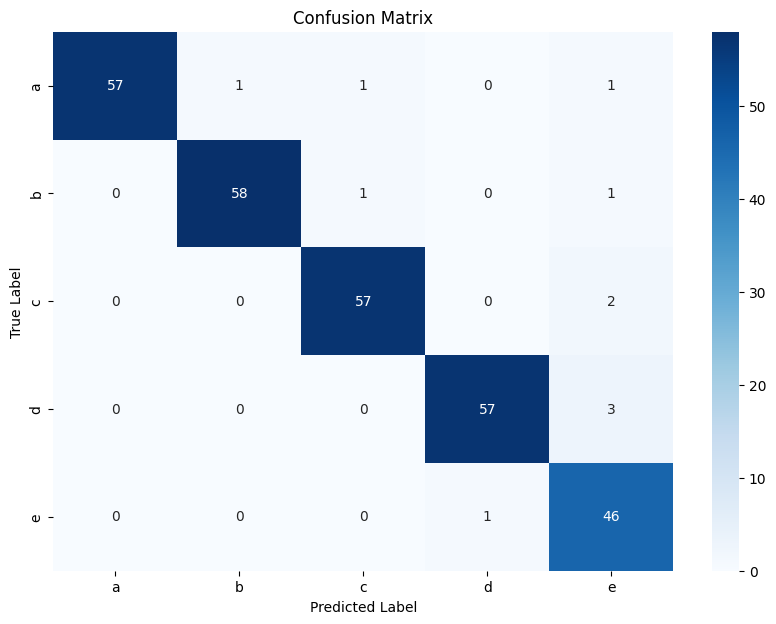


Misclassification Rates:
True: a, Predicted: b -> Rate: 0.00
True: a, Predicted: c -> Rate: 0.00
True: a, Predicted: d -> Rate: 0.00
True: a, Predicted: e -> Rate: 0.02
True: b, Predicted: a -> Rate: 0.02
True: b, Predicted: c -> Rate: 0.00
True: b, Predicted: d -> Rate: 0.00
True: b, Predicted: e -> Rate: 0.00
True: c, Predicted: a -> Rate: 0.00
True: c, Predicted: b -> Rate: 0.00
True: c, Predicted: d -> Rate: 0.00
True: c, Predicted: e -> Rate: 0.03
True: d, Predicted: a -> Rate: 0.01
True: d, Predicted: b -> Rate: 0.00
True: d, Predicted: c -> Rate: 0.00
True: d, Predicted: e -> Rate: 0.06
True: e, Predicted: a -> Rate: 0.00
True: e, Predicted: b -> Rate: 0.00
True: e, Predicted: c -> Rate: 0.00
True: e, Predicted: d -> Rate: 0.04


In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(mean_confusion_matrix_rounded, annot=True, fmt='d', cmap='Blues', xticklabels=train_df['label'].unique(), yticklabels=train_df['label'].unique())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
# Quantitative Analysis: Calculate misclassification rates
misclassifications = {}
labels =['a','b','c','d','e']
for i, true_label in enumerate(labels):
    for j, pred_label in enumerate(labels):
        if i != j:
            misclassifications[(true_label, pred_label)] = conf_matrix[i, j] / conf_matrix[i].sum()

# Print misclassification rates
print("\nMisclassification Rates:")
for (true_label, pred_label), rate in misclassifications.items():
    print(f"True: {true_label}, Predicted: {pred_label} -> Rate: {rate:.2f}")

           Average
Precision    0.956
Recall       0.960
F1-score     0.956


<ipython-input-177-490111ec79fc>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=averages_df_percentage.index, y='Average', data=averages_df_percentage, palette=colors)


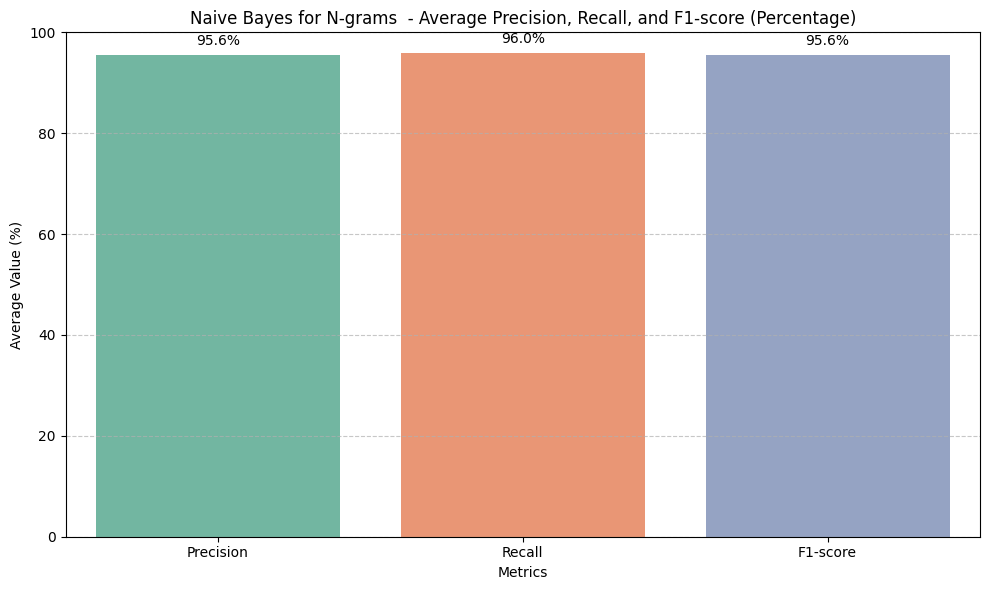

In [ ]:
generateAveragePlot(results3_df,"Naive Bayes for N-grams ")

## Support Vector Machines (SVM)

### Classification Training SVM for bow

In [ ]:
accuracy_scores = []
classification_reports = []
confusion_matrices = []

for train_index, test_index in kf.split(df):
    train_df, test_df = df.iloc[train_index], df.iloc[test_index]
    X_train_bow, X_test_bow = bowDataSet(train_df, test_df)

    svm = SVC(kernel='linear')
    svm.fit(X_train_bow, train_df['label'])

    # Evaluate the model
    y_pred_bow = svm.predict(X_test_bow)


    # Calculate accuracy
    accuracy = accuracy_score(test_df['label'], y_pred_bow)
    accuracy_scores.append(accuracy)

    ## Store the classification report
    classification_rep = classification_report(test_df['label'], y_pred_bow, output_dict=True)
    classification_reports.append(classification_rep)

    # Store the confusion matrix
    conf_matrix = confusion_matrix(test_df['label'], y_pred_bow)
    confusion_matrices.append(conf_matrix)

# Calculate mean accuracy and round it
mean_accuracy = np.mean(accuracy_scores)
mean_accuracy_rounded = round(mean_accuracy, 2)
print("Mean Accuracy:", mean_accuracy_rounded)

# Calculate mean classification report and round metrics
mean_classification_report = {}
for cls in classification_reports[0].keys():
    if cls not in ['accuracy', 'macro avg', 'weighted avg']:
        precision = np.mean([report[cls]['precision'] for report in classification_reports])
        recall = np.mean([report[cls]['recall'] for report in classification_reports])
        f1_score = np.mean([report[cls]['f1-score'] for report in classification_reports])
        mean_classification_report[cls] = {
            'Precision': round(precision, 2),
            'Recall': round(recall, 2),
            'F1-score': round(f1_score, 2)
        }
results4_df = pd.DataFrame.from_dict(mean_classification_report, orient='index')
print("\nMean SVM Classification Report for BoW:\n", results4_df)

# Calculate mean confusion matrix and round it
mean_confusion_matrix = np.mean(confusion_matrices, axis=0)
mean_confusion_matrix_rounded = np.round(mean_confusion_matrix).astype(int)
print("\nMean Confusion Matrix:\n", mean_confusion_matrix_rounded)

BoW Training DataFrame shape: (1720, 19896)
BoW Testing DataFrame shape: (192, 19896)
BoW Training DataFrame shape: (1720, 20141)
BoW Testing DataFrame shape: (192, 20141)
BoW Training DataFrame shape: (1721, 19924)
BoW Testing DataFrame shape: (191, 19924)
BoW Training DataFrame shape: (1721, 20036)
BoW Testing DataFrame shape: (191, 20036)
BoW Training DataFrame shape: (1721, 20037)
BoW Testing DataFrame shape: (191, 20037)
BoW Training DataFrame shape: (1721, 20085)
BoW Testing DataFrame shape: (191, 20085)
BoW Training DataFrame shape: (1721, 19898)
BoW Testing DataFrame shape: (191, 19898)
BoW Training DataFrame shape: (1721, 20176)
BoW Testing DataFrame shape: (191, 20176)
BoW Training DataFrame shape: (1721, 20065)
BoW Testing DataFrame shape: (191, 20065)
BoW Training DataFrame shape: (1721, 19885)
BoW Testing DataFrame shape: (191, 19885)
Mean Accuracy: 0.93

Mean SVM Classification Report for BoW:
    Precision  Recall  F1-score
a       0.85    0.95      0.89
b       0.92    

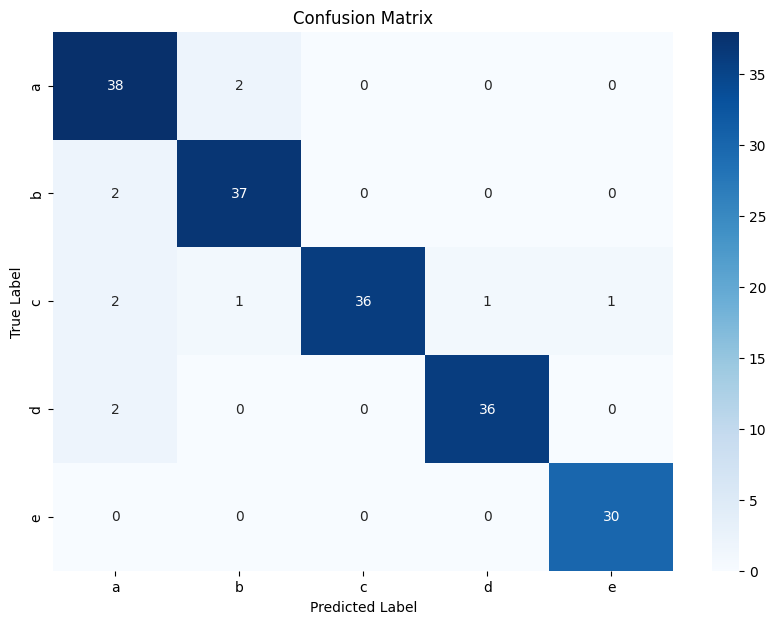


Misclassification Rates:
True: a, Predicted: b -> Rate: 0.02
True: a, Predicted: c -> Rate: 0.00
True: a, Predicted: d -> Rate: 0.00
True: a, Predicted: e -> Rate: 0.00
True: b, Predicted: a -> Rate: 0.08
True: b, Predicted: c -> Rate: 0.00
True: b, Predicted: d -> Rate: 0.00
True: b, Predicted: e -> Rate: 0.00
True: c, Predicted: a -> Rate: 0.07
True: c, Predicted: b -> Rate: 0.02
True: c, Predicted: d -> Rate: 0.00
True: c, Predicted: e -> Rate: 0.02
True: d, Predicted: a -> Rate: 0.05
True: d, Predicted: b -> Rate: 0.02
True: d, Predicted: c -> Rate: 0.02
True: d, Predicted: e -> Rate: 0.02
True: e, Predicted: a -> Rate: 0.00
True: e, Predicted: b -> Rate: 0.00
True: e, Predicted: c -> Rate: 0.08
True: e, Predicted: d -> Rate: 0.00


In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(mean_confusion_matrix_rounded, annot=True, fmt='d', cmap='Blues', xticklabels=train_df['label'].unique(), yticklabels=train_df['label'].unique())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
# Quantitative Analysis: Calculate misclassification rates
misclassifications = {}
labels =['a','b','c','d','e']
for i, true_label in enumerate(labels):
    for j, pred_label in enumerate(labels):
        if i != j:
            misclassifications[(true_label, pred_label)] = conf_matrix[i, j] / conf_matrix[i].sum()

# Print misclassification rates
print("\nMisclassification Rates:")
for (true_label, pred_label), rate in misclassifications.items():
    print(f"True: {true_label}, Predicted: {pred_label} -> Rate: {rate:.2f}")

           Average
Precision    0.928
Recall       0.930
F1-score     0.926


<ipython-input-177-490111ec79fc>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=averages_df_percentage.index, y='Average', data=averages_df_percentage, palette=colors)


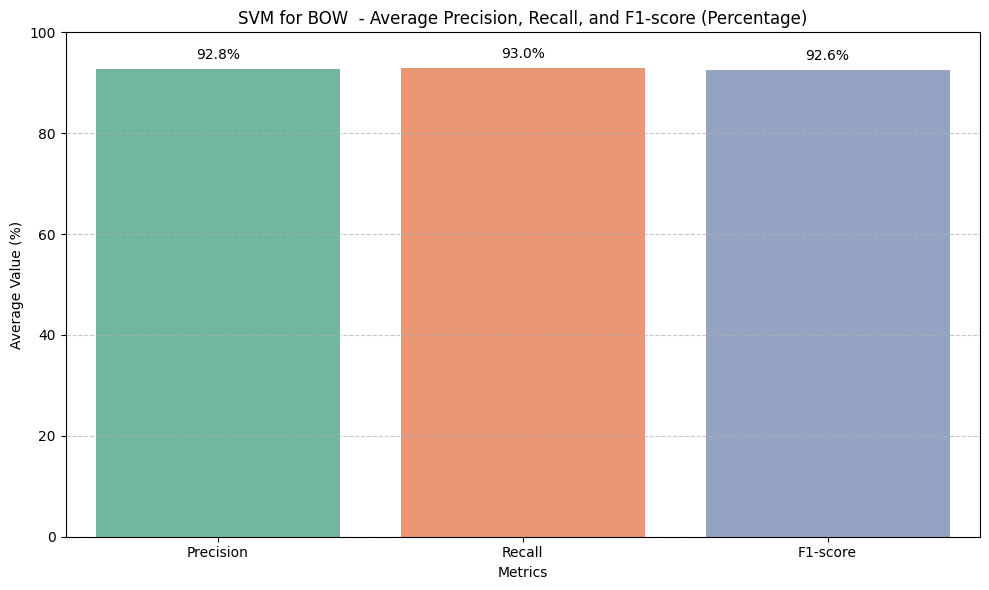

In [ ]:
generateAveragePlot(results4_df,"SVM for BOW ")

### Classification Training SVM for TF-IDF

In [ ]:
accuracy_scores = []
classification_reports = []
confusion_matrices = []

for train_index, test_index in kf.split(df):
    train_df, test_df = df.iloc[train_index], df.iloc[test_index]
    X_train_tfidf, X_test_tfidf = TFIDFDataSet(train_df, test_df)

    svm = SVC(kernel='linear')
    svm.fit(X_train_tfidf, train_df['label'])

    # Evaluate the model
    y_pred_tfidf = svm.predict(X_test_tfidf)


    # Calculate accuracy
    accuracy = accuracy_score(test_df['label'], y_pred_tfidf)
    accuracy_scores.append(accuracy)

    ## Store the classification report
    classification_rep = classification_report(test_df['label'], y_pred_tfidf, output_dict=True)
    classification_reports.append(classification_rep)

    # Store the confusion matrix
    conf_matrix = confusion_matrix(test_df['label'], y_pred_tfidf)
    confusion_matrices.append(conf_matrix)

# Calculate mean accuracy and round it
mean_accuracy = np.mean(accuracy_scores)
mean_accuracy_rounded = round(mean_accuracy, 2)
print("Mean Accuracy:", mean_accuracy_rounded)

# Calculate mean classification report and round metrics
mean_classification_report = {}
for cls in classification_reports[0].keys():
    if cls not in ['accuracy', 'macro avg', 'weighted avg']:
        precision = np.mean([report[cls]['precision'] for report in classification_reports])
        recall = np.mean([report[cls]['recall'] for report in classification_reports])
        f1_score = np.mean([report[cls]['f1-score'] for report in classification_reports])
        mean_classification_report[cls] = {
            'Precision': round(precision, 2),
            'Recall': round(recall, 2),
            'F1-score': round(f1_score, 2)
        }
results5_df = pd.DataFrame.from_dict(mean_classification_report, orient='index')
print("\nMean SVM Classification Report for TF-IDF:\n", results5_df)

# Calculate mean confusion matrix and round it
mean_confusion_matrix = np.mean(confusion_matrices, axis=0)
mean_confusion_matrix_rounded = np.round(mean_confusion_matrix).astype(int)
print("\nMean Confusion Matrix:\n", mean_confusion_matrix_rounded)

TF-IDF Training DataFrame shape: (1720, 19896)
TF-IDF Testing DataFrame shape: (192, 19896)
TF-IDF Training DataFrame shape: (1720, 20141)
TF-IDF Testing DataFrame shape: (192, 20141)
TF-IDF Training DataFrame shape: (1721, 19924)
TF-IDF Testing DataFrame shape: (191, 19924)
TF-IDF Training DataFrame shape: (1721, 20036)
TF-IDF Testing DataFrame shape: (191, 20036)
TF-IDF Training DataFrame shape: (1721, 20037)
TF-IDF Testing DataFrame shape: (191, 20037)
TF-IDF Training DataFrame shape: (1721, 20085)
TF-IDF Testing DataFrame shape: (191, 20085)
TF-IDF Training DataFrame shape: (1721, 19898)
TF-IDF Testing DataFrame shape: (191, 19898)
TF-IDF Training DataFrame shape: (1721, 20176)
TF-IDF Testing DataFrame shape: (191, 20176)
TF-IDF Training DataFrame shape: (1721, 20065)
TF-IDF Testing DataFrame shape: (191, 20065)
TF-IDF Training DataFrame shape: (1721, 19885)
TF-IDF Testing DataFrame shape: (191, 19885)
Mean Accuracy: 0.95

Mean SVM Classification Report for TF-IDF:
    Precision  R

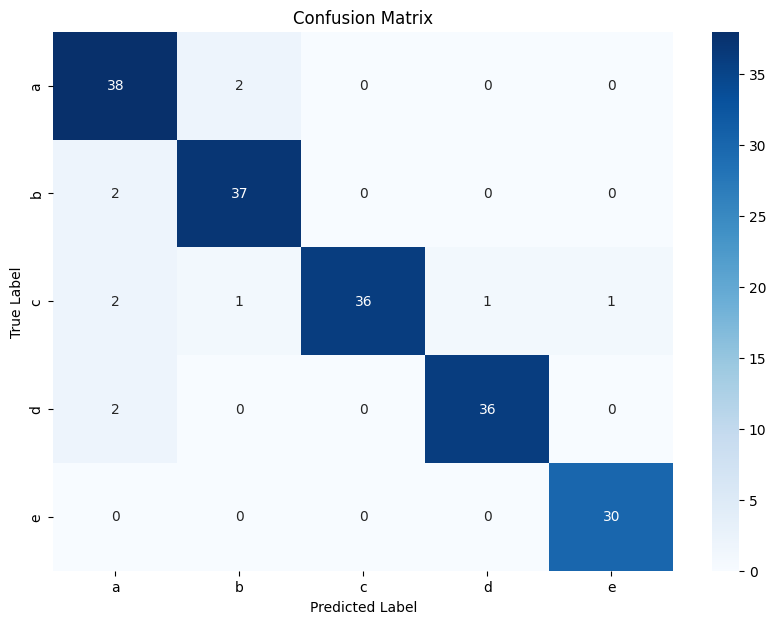


Misclassification Rates:
True: a, Predicted: b -> Rate: 0.02
True: a, Predicted: c -> Rate: 0.00
True: a, Predicted: d -> Rate: 0.00
True: a, Predicted: e -> Rate: 0.00
True: b, Predicted: a -> Rate: 0.08
True: b, Predicted: c -> Rate: 0.00
True: b, Predicted: d -> Rate: 0.00
True: b, Predicted: e -> Rate: 0.00
True: c, Predicted: a -> Rate: 0.07
True: c, Predicted: b -> Rate: 0.02
True: c, Predicted: d -> Rate: 0.00
True: c, Predicted: e -> Rate: 0.02
True: d, Predicted: a -> Rate: 0.05
True: d, Predicted: b -> Rate: 0.02
True: d, Predicted: c -> Rate: 0.02
True: d, Predicted: e -> Rate: 0.02
True: e, Predicted: a -> Rate: 0.00
True: e, Predicted: b -> Rate: 0.00
True: e, Predicted: c -> Rate: 0.08
True: e, Predicted: d -> Rate: 0.00


In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(mean_confusion_matrix_rounded, annot=True, fmt='d', cmap='Blues', xticklabels=train_df['label'].unique(), yticklabels=train_df['label'].unique())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
# Quantitative Analysis: Calculate misclassification rates
misclassifications = {}
labels =['a','b','c','d','e']
for i, true_label in enumerate(labels):
    for j, pred_label in enumerate(labels):
        if i != j:
            misclassifications[(true_label, pred_label)] = conf_matrix[i, j] / conf_matrix[i].sum()

# Print misclassification rates
print("\nMisclassification Rates:")
for (true_label, pred_label), rate in misclassifications.items():
    print(f"True: {true_label}, Predicted: {pred_label} -> Rate: {rate:.2f}")

           Average
Precision    0.944
Recall       0.948
F1-score     0.942


<ipython-input-177-490111ec79fc>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=averages_df_percentage.index, y='Average', data=averages_df_percentage, palette=colors)


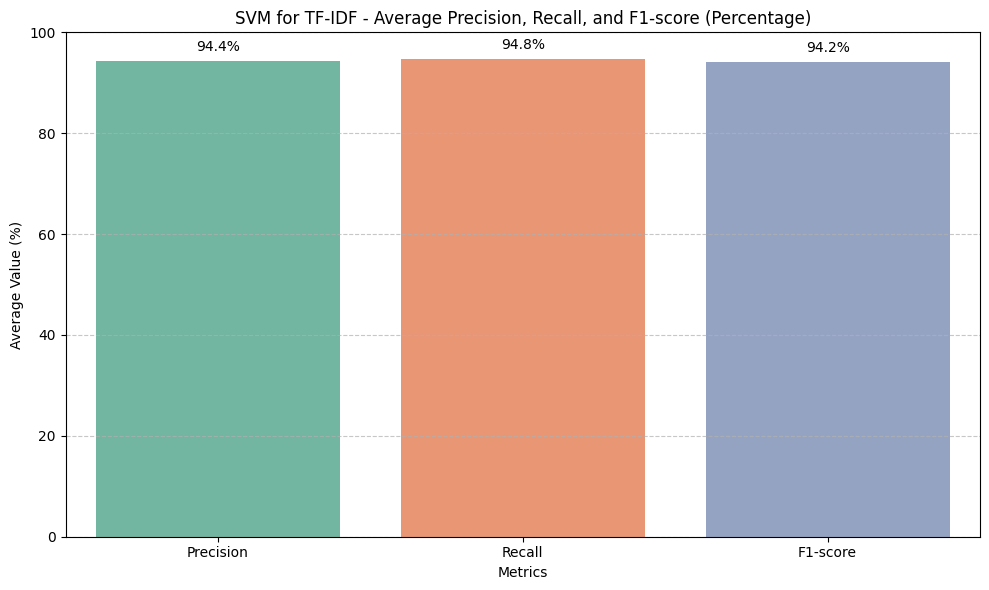

In [ ]:
generateAveragePlot(results5_df,"SVM for TF-IDF")

### Classification Training SVM for N-grams

In [ ]:
accuracy_scores = []
classification_reports = []
confusion_matrices = []
for train_index, test_index in kf.split(df):
    train_df, test_df = df.iloc[train_index], df.iloc[test_index]
    X_train_ngrams, X_test_ngrams = NgramsDataSet(train_df, test_df)

    svm = SVC(kernel='linear')
    svm.fit(X_train_ngrams, train_df['label'])

    # Evaluate the model
    y_pred_ngrams = svm.predict(X_test_ngrams)


    # Calculate accuracy
    accuracy = accuracy_score(test_df['label'], y_pred_ngrams)
    accuracy_scores.append(accuracy)

    ## Store the classification report
    classification_rep = classification_report(test_df['label'], y_pred_ngrams, output_dict=True)
    classification_reports.append(classification_rep)

     # Store the confusion matrix
    conf_matrix = confusion_matrix(test_df['label'], y_pred_ngrams)
    confusion_matrices.append(conf_matrix)

# Calculate mean accuracy and round it
mean_accuracy = np.mean(accuracy_scores)
mean_accuracy_rounded = round(mean_accuracy, 2)
print("Mean Accuracy:", mean_accuracy_rounded)

# Calculate mean classification report and round metrics
mean_classification_report = {}
for cls in classification_reports[0].keys():
    if cls not in ['accuracy', 'macro avg', 'weighted avg']:
        precision = np.mean([report[cls]['precision'] for report in classification_reports])
        recall = np.mean([report[cls]['recall'] for report in classification_reports])
        f1_score = np.mean([report[cls]['f1-score'] for report in classification_reports])
        mean_classification_report[cls] = {
            'Precision': round(precision, 2),
            'Recall': round(recall, 2),
            'F1-score': round(f1_score, 2)
        }
results6_df = pd.DataFrame.from_dict(mean_classification_report, orient='index')
print("\nMean SVM Classification Report for N-grams:\n", results6_df)

# Calculate mean confusion matrix and round it
mean_confusion_matrix = np.mean(confusion_matrices, axis=0)
mean_confusion_matrix_rounded = np.round(mean_confusion_matrix).astype(int)
print("\nMean Confusion Matrix:\n", mean_confusion_matrix_rounded)

Shape of X_train_ngrams: (1720, 84996)
Shape of X_test_ngrams: (192, 84996)
Shape of X_train_ngrams: (1720, 85345)
Shape of X_test_ngrams: (192, 85345)
Shape of X_train_ngrams: (1721, 85151)
Shape of X_test_ngrams: (191, 85151)
Shape of X_train_ngrams: (1721, 85080)
Shape of X_test_ngrams: (191, 85080)
Shape of X_train_ngrams: (1721, 85303)
Shape of X_test_ngrams: (191, 85303)
Shape of X_train_ngrams: (1721, 84928)
Shape of X_test_ngrams: (191, 84928)
Shape of X_train_ngrams: (1721, 85128)
Shape of X_test_ngrams: (191, 85128)
Shape of X_train_ngrams: (1721, 85682)
Shape of X_test_ngrams: (191, 85682)
Shape of X_train_ngrams: (1721, 84962)
Shape of X_test_ngrams: (191, 84962)
Shape of X_train_ngrams: (1721, 84555)
Shape of X_test_ngrams: (191, 84555)
Mean Accuracy: 0.93

Mean SVM Classification Report for N-grams:
    Precision  Recall  F1-score
a       0.87    0.96      0.91
b       0.93    0.93      0.93
c       0.97    0.89      0.93
d       0.95    0.93      0.94
e       0.96    0.9

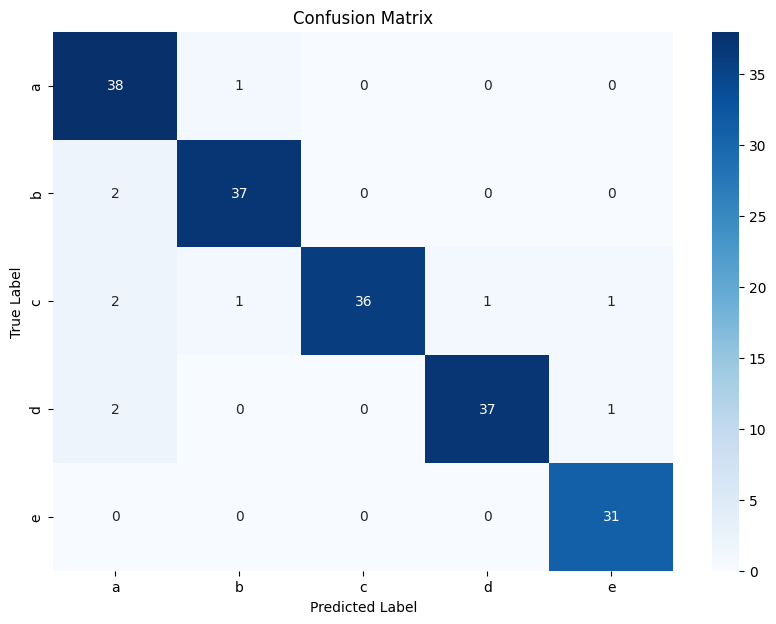


Misclassification Rates:
True: a, Predicted: b -> Rate: 0.04
True: a, Predicted: c -> Rate: 0.00
True: a, Predicted: d -> Rate: 0.00
True: a, Predicted: e -> Rate: 0.00
True: b, Predicted: a -> Rate: 0.08
True: b, Predicted: c -> Rate: 0.00
True: b, Predicted: d -> Rate: 0.00
True: b, Predicted: e -> Rate: 0.00
True: c, Predicted: a -> Rate: 0.07
True: c, Predicted: b -> Rate: 0.02
True: c, Predicted: d -> Rate: 0.00
True: c, Predicted: e -> Rate: 0.02
True: d, Predicted: a -> Rate: 0.02
True: d, Predicted: b -> Rate: 0.00
True: d, Predicted: c -> Rate: 0.05
True: d, Predicted: e -> Rate: 0.02
True: e, Predicted: a -> Rate: 0.00
True: e, Predicted: b -> Rate: 0.00
True: e, Predicted: c -> Rate: 0.00
True: e, Predicted: d -> Rate: 0.00


In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(mean_confusion_matrix_rounded, annot=True, fmt='d', cmap='Blues', xticklabels=train_df['label'].unique(), yticklabels=train_df['label'].unique())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
# Quantitative Analysis: Calculate misclassification rates
misclassifications = {}
labels =['a','b','c','d','e']
for i, true_label in enumerate(labels):
    for j, pred_label in enumerate(labels):
        if i != j:
            misclassifications[(true_label, pred_label)] = conf_matrix[i, j] / conf_matrix[i].sum()

# Print misclassification rates
print("\nMisclassification Rates:")
for (true_label, pred_label), rate in misclassifications.items():
    print(f"True: {true_label}, Predicted: {pred_label} -> Rate: {rate:.2f}")

           Average
Precision    0.936
Recall       0.938
F1-score     0.936


<ipython-input-177-490111ec79fc>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=averages_df_percentage.index, y='Average', data=averages_df_percentage, palette=colors)


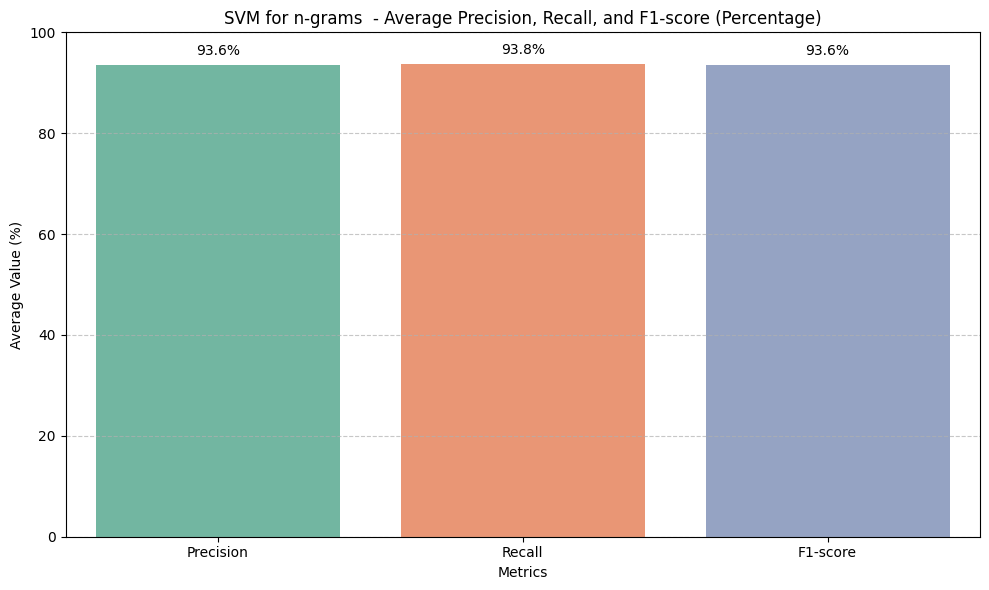

In [ ]:
generateAveragePlot(results6_df,"SVM for n-grams ")

**Classification Training Random Forest for TF-IDF**

In [ ]:
accuracy_scores = []
classification_reports = []
confusion_matrices = []

for train_index, test_index in kf.split(df):
    train_df, test_df = df.iloc[train_index], df.iloc[test_index]
    X_train_tfidf, X_test_tfidf = TFIDFDataSet(train_df, test_df)

    # Initialize the Random Forest classifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

    # Fit the model on the training data
    rf_classifier.fit(X_train_tfidf, train_df['label'])

    # Predict on the test data
    y_pred_tfidf_rf = rf_classifier.predict(X_test_tfidf)

    # Calculate accuracy
    accuracy_rf = accuracy_score(test_df['label'], y_pred_tfidf_rf)
    accuracy_scores.append(accuracy_rf)

    ## Store the classification report
    classification_rep = classification_report(test_df['label'], y_pred_tfidf_rf, output_dict=True)
    classification_reports.append(classification_rep)

    # Store the confusion matrix
    conf_matrix = confusion_matrix(test_df['label'], y_pred_tfidf_rf)
    confusion_matrices.append(conf_matrix)

# Calculate mean accuracy and round it
mean_accuracy = np.mean(accuracy_scores)
mean_accuracy_rounded = round(mean_accuracy, 2)
print("Mean Accuracy:", mean_accuracy_rounded)

# Calculate mean classification report and round metrics
mean_classification_report = {}
for cls in classification_reports[0].keys():
    if cls not in ['accuracy', 'macro avg', 'weighted avg']:
        precision = np.mean([report[cls]['precision'] for report in classification_reports])
        recall = np.mean([report[cls]['recall'] for report in classification_reports])
        f1_score = np.mean([report[cls]['f1-score'] for report in classification_reports])
        mean_classification_report[cls] = {
            'Precision': round(precision, 2),
            'Recall': round(recall, 2),
            'F1-score': round(f1_score, 2)
        }
results7_df = pd.DataFrame.from_dict(mean_classification_report, orient='index')
print("\nRandom Forest Classification Report for TF-IDF:\n", results7_df)

# Calculate mean confusion matrix and round it
mean_confusion_matrix = np.mean(confusion_matrices, axis=0)
mean_confusion_matrix_rounded = np.round(mean_confusion_matrix).astype(int)
print("\nMean Confusion Matrix:\n", mean_confusion_matrix_rounded)

TF-IDF Training DataFrame shape: (1720, 19896)
TF-IDF Testing DataFrame shape: (192, 19896)
TF-IDF Training DataFrame shape: (1720, 20141)
TF-IDF Testing DataFrame shape: (192, 20141)
TF-IDF Training DataFrame shape: (1721, 19924)
TF-IDF Testing DataFrame shape: (191, 19924)
TF-IDF Training DataFrame shape: (1721, 20036)
TF-IDF Testing DataFrame shape: (191, 20036)
TF-IDF Training DataFrame shape: (1721, 20037)
TF-IDF Testing DataFrame shape: (191, 20037)
TF-IDF Training DataFrame shape: (1721, 20085)
TF-IDF Testing DataFrame shape: (191, 20085)
TF-IDF Training DataFrame shape: (1721, 19898)
TF-IDF Testing DataFrame shape: (191, 19898)
TF-IDF Training DataFrame shape: (1721, 20176)
TF-IDF Testing DataFrame shape: (191, 20176)
TF-IDF Training DataFrame shape: (1721, 20065)
TF-IDF Testing DataFrame shape: (191, 20065)
TF-IDF Training DataFrame shape: (1721, 19885)
TF-IDF Testing DataFrame shape: (191, 19885)
Mean Accuracy: 0.91

Random Forest Classification Report for TF-IDF:
    Precisi

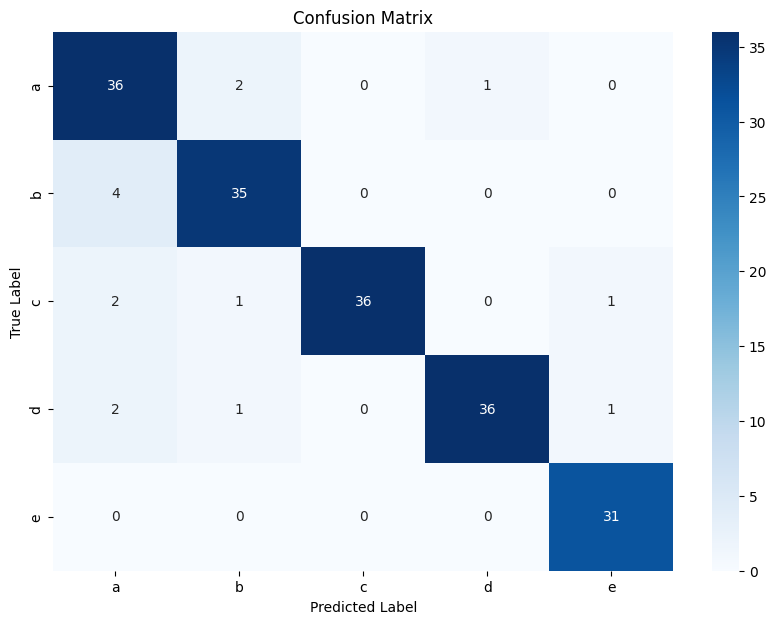


Misclassification Rates:
True: a, Predicted: b -> Rate: 0.07
True: a, Predicted: c -> Rate: 0.02
True: a, Predicted: d -> Rate: 0.04
True: a, Predicted: e -> Rate: 0.02
True: b, Predicted: a -> Rate: 0.08
True: b, Predicted: c -> Rate: 0.00
True: b, Predicted: d -> Rate: 0.03
True: b, Predicted: e -> Rate: 0.00
True: c, Predicted: a -> Rate: 0.05
True: c, Predicted: b -> Rate: 0.02
True: c, Predicted: d -> Rate: 0.02
True: c, Predicted: e -> Rate: 0.02
True: d, Predicted: a -> Rate: 0.05
True: d, Predicted: b -> Rate: 0.00
True: d, Predicted: c -> Rate: 0.02
True: d, Predicted: e -> Rate: 0.02
True: e, Predicted: a -> Rate: 0.00
True: e, Predicted: b -> Rate: 0.00
True: e, Predicted: c -> Rate: 0.00
True: e, Predicted: d -> Rate: 0.00


In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(mean_confusion_matrix_rounded, annot=True, fmt='d', cmap='Blues', xticklabels=train_df['label'].unique(), yticklabels=train_df['label'].unique())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
# Quantitative Analysis: Calculate misclassification rates
misclassifications = {}
labels =['a','b','c','d','e']
for i, true_label in enumerate(labels):
    for j, pred_label in enumerate(labels):
        if i != j:
            misclassifications[(true_label, pred_label)] = conf_matrix[i, j] / conf_matrix[i].sum()

# Print misclassification rates
print("\nMisclassification Rates:")
for (true_label, pred_label), rate in misclassifications.items():
    print(f"True: {true_label}, Predicted: {pred_label} -> Rate: {rate:.2f}")

           Average
Precision    0.914
Recall       0.918
F1-score     0.912


<ipython-input-177-490111ec79fc>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=averages_df_percentage.index, y='Average', data=averages_df_percentage, palette=colors)


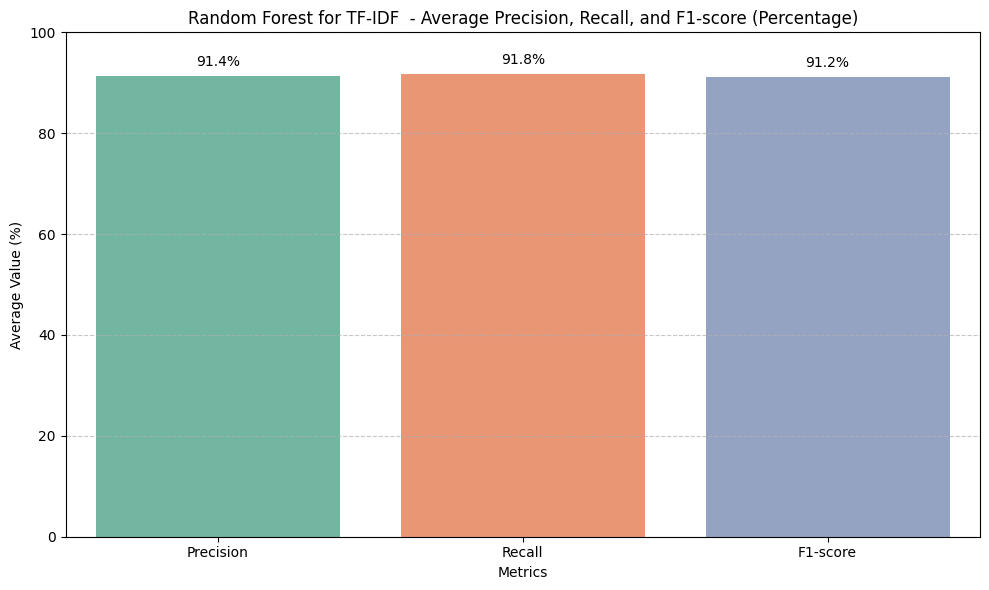

In [ ]:
generateAveragePlot(results7_df,"Random Forest for TF-IDF " )

**Classification Training Random Forest for BoW**

In [ ]:
accuracy_scores = []
classification_reports = []
confusion_matrices = []

for train_index, test_index in kf.split(df):
    train_df, test_df = df.iloc[train_index], df.iloc[test_index]
    X_train_bow, X_test_bow = bowDataSet(train_df, test_df)

    # Initialize the Random Forest classifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

    # Fit the model on the training data
    rf_classifier.fit(X_train_bow, train_df['label'])

    # Predict on the test data
    y_pred_bow_rf = rf_classifier.predict(X_test_bow)

    # Calculate accuracy
    accuracy_rf_bow = accuracy_score(test_df['label'], y_pred_bow_rf)
    accuracy_scores.append(accuracy_rf_bow)

    ## Store the classification report
    classification_rep = classification_report(test_df['label'], y_pred_bow_rf, output_dict=True)
    classification_reports.append(classification_rep)

    # Store the confusion matrix
    conf_matrix = confusion_matrix(test_df['label'], y_pred_bow_rf)
    confusion_matrices.append(conf_matrix)

# Calculate mean accuracy and round it
mean_accuracy = np.mean(accuracy_scores)
mean_accuracy_rounded = round(mean_accuracy, 2)
print("Mean Accuracy:", mean_accuracy_rounded)

# Calculate mean classification report and round metrics
mean_classification_report = {}
for cls in classification_reports[0].keys():
    if cls not in ['accuracy', 'macro avg', 'weighted avg']:
        precision = np.mean([report[cls]['precision'] for report in classification_reports])
        recall = np.mean([report[cls]['recall'] for report in classification_reports])
        f1_score = np.mean([report[cls]['f1-score'] for report in classification_reports])
        mean_classification_report[cls] = {
            'Precision': round(precision, 2),
            'Recall': round(recall, 2),
            'F1-score': round(f1_score, 2)
        }
results8_df = pd.DataFrame.from_dict(mean_classification_report, orient='index')
print("\nMean Training Random Forest Classification Report for BoW:\n", results8_df)

# Calculate mean confusion matrix and round it
mean_confusion_matrix = np.mean(confusion_matrices, axis=0)
mean_confusion_matrix_rounded = np.round(mean_confusion_matrix).astype(int)
print("\nMean Confusion Matrix:\n", mean_confusion_matrix_rounded)

BoW Training DataFrame shape: (1720, 19896)
BoW Testing DataFrame shape: (192, 19896)
BoW Training DataFrame shape: (1720, 20141)
BoW Testing DataFrame shape: (192, 20141)
BoW Training DataFrame shape: (1721, 19924)
BoW Testing DataFrame shape: (191, 19924)
BoW Training DataFrame shape: (1721, 20036)
BoW Testing DataFrame shape: (191, 20036)
BoW Training DataFrame shape: (1721, 20037)
BoW Testing DataFrame shape: (191, 20037)
BoW Training DataFrame shape: (1721, 20085)
BoW Testing DataFrame shape: (191, 20085)
BoW Training DataFrame shape: (1721, 19898)
BoW Testing DataFrame shape: (191, 19898)
BoW Training DataFrame shape: (1721, 20176)
BoW Testing DataFrame shape: (191, 20176)
BoW Training DataFrame shape: (1721, 20065)
BoW Testing DataFrame shape: (191, 20065)
BoW Training DataFrame shape: (1721, 19885)
BoW Testing DataFrame shape: (191, 19885)
Mean Accuracy: 0.91

Mean Training Random Forest Classification Report for BoW:
    Precision  Recall  F1-score
a       0.83    0.93      0.

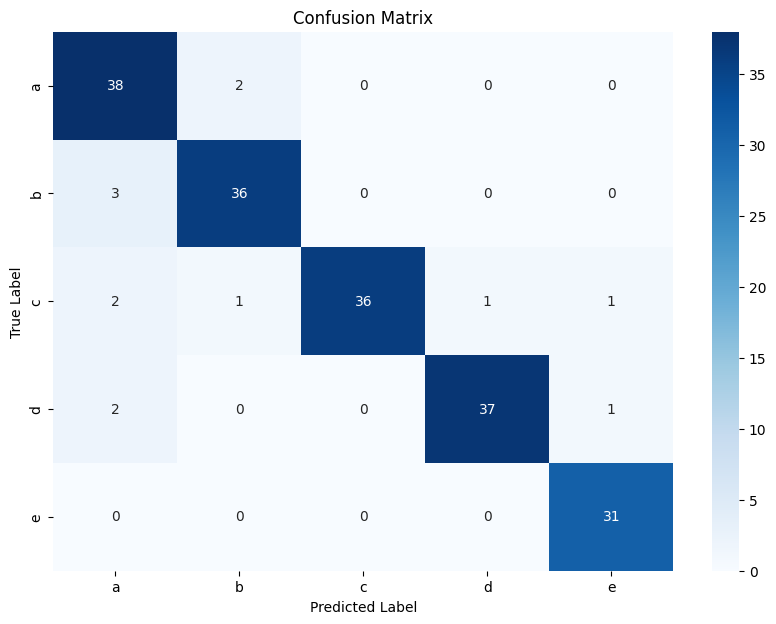


Misclassification Rates:
True: a, Predicted: b -> Rate: 0.04
True: a, Predicted: c -> Rate: 0.02
True: a, Predicted: d -> Rate: 0.02
True: a, Predicted: e -> Rate: 0.02
True: b, Predicted: a -> Rate: 0.11
True: b, Predicted: c -> Rate: 0.00
True: b, Predicted: d -> Rate: 0.00
True: b, Predicted: e -> Rate: 0.03
True: c, Predicted: a -> Rate: 0.05
True: c, Predicted: b -> Rate: 0.02
True: c, Predicted: d -> Rate: 0.02
True: c, Predicted: e -> Rate: 0.02
True: d, Predicted: a -> Rate: 0.05
True: d, Predicted: b -> Rate: 0.00
True: d, Predicted: c -> Rate: 0.02
True: d, Predicted: e -> Rate: 0.02
True: e, Predicted: a -> Rate: 0.00
True: e, Predicted: b -> Rate: 0.00
True: e, Predicted: c -> Rate: 0.00
True: e, Predicted: d -> Rate: 0.00


In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(mean_confusion_matrix_rounded, annot=True, fmt='d', cmap='Blues', xticklabels=train_df['label'].unique(), yticklabels=train_df['label'].unique())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
# Quantitative Analysis: Calculate misclassification rates
misclassifications = {}
labels =['a','b','c','d','e']
for i, true_label in enumerate(labels):
    for j, pred_label in enumerate(labels):
        if i != j:
            misclassifications[(true_label, pred_label)] = conf_matrix[i, j] / conf_matrix[i].sum()

# Print misclassification rates
print("\nMisclassification Rates:")
for (true_label, pred_label), rate in misclassifications.items():
    print(f"True: {true_label}, Predicted: {pred_label} -> Rate: {rate:.2f}")

           Average
Precision    0.914
Recall       0.914
F1-score     0.910


<ipython-input-177-490111ec79fc>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=averages_df_percentage.index, y='Average', data=averages_df_percentage, palette=colors)


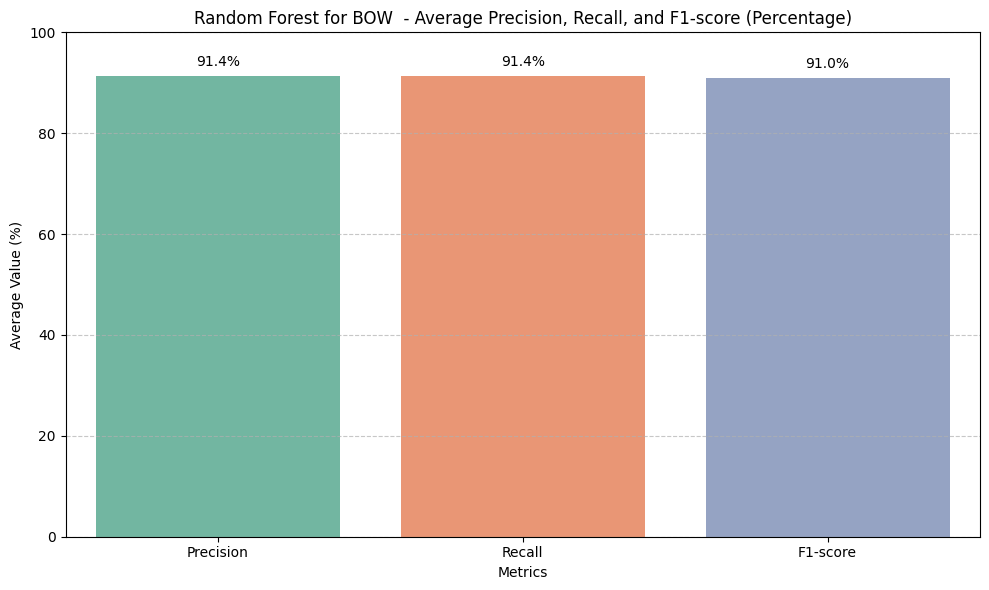

In [ ]:
generateAveragePlot(results8_df,"Random Forest for BOW ")

Classification Training Random Forest for N-grams

In [ ]:
accuracy_scores = []
classification_reports = []
confusion_matrices = []

for train_index, test_index in kf.split(df):
    train_df, test_df = df.iloc[train_index], df.iloc[test_index]
    X_train_ngrams, X_test_ngrams = NgramsDataSet(train_df, test_df)

    # Initialize the Random Forest classifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

    # Fit the model on the training data
    rf_classifier.fit(X_train_ngrams, train_df['label'])

    # Predict on the test data
    y_pred_ngrams_RF = rf_classifier.predict(X_test_ngrams)

    # Calculate accuracy
    accuracy_rf_ngrams = accuracy_score(test_df['label'], y_pred_ngrams_RF)
    accuracy_scores.append(accuracy_rf_ngrams)

    ## Store the classification report
    classification_rep = classification_report(test_df['label'], y_pred_ngrams_RF, output_dict=True)
    classification_reports.append(classification_rep)

    # Store the confusion matrix
    conf_matrix = confusion_matrix(test_df['label'], y_pred_ngrams_RF)
    confusion_matrices.append(conf_matrix)

# Calculate mean accuracy and round it
mean_accuracy = np.mean(accuracy_scores)
mean_accuracy_rounded = round(mean_accuracy, 2)
print("Mean Accuracy:", mean_accuracy_rounded)

# Calculate mean classification report and round metrics
mean_classification_report = {}
for cls in classification_reports[0].keys():
    if cls not in ['accuracy', 'macro avg', 'weighted avg']:
        precision = np.mean([report[cls]['precision'] for report in classification_reports])
        recall = np.mean([report[cls]['recall'] for report in classification_reports])
        f1_score = np.mean([report[cls]['f1-score'] for report in classification_reports])
        mean_classification_report[cls] = {
            'Precision': round(precision, 2),
            'Recall': round(recall, 2),
            'F1-score': round(f1_score, 2)
        }
results9_df = pd.DataFrame.from_dict(mean_classification_report, orient='index')
print("\nMean Training Random Forest Classification Report for N-grams:\n", results9_df)

# Calculate mean confusion matrix and round it
mean_confusion_matrix = np.mean(confusion_matrices, axis=0)
mean_confusion_matrix_rounded = np.round(mean_confusion_matrix).astype(int)
print("\nMean Confusion Matrix:\n", mean_confusion_matrix_rounded)


Shape of X_train_ngrams: (1720, 84996)
Shape of X_test_ngrams: (192, 84996)
Shape of X_train_ngrams: (1720, 85345)
Shape of X_test_ngrams: (192, 85345)
Shape of X_train_ngrams: (1721, 85151)
Shape of X_test_ngrams: (191, 85151)
Shape of X_train_ngrams: (1721, 85080)
Shape of X_test_ngrams: (191, 85080)
Shape of X_train_ngrams: (1721, 85303)
Shape of X_test_ngrams: (191, 85303)
Shape of X_train_ngrams: (1721, 84928)
Shape of X_test_ngrams: (191, 84928)
Shape of X_train_ngrams: (1721, 85128)
Shape of X_test_ngrams: (191, 85128)
Shape of X_train_ngrams: (1721, 85682)
Shape of X_test_ngrams: (191, 85682)
Shape of X_train_ngrams: (1721, 84962)
Shape of X_test_ngrams: (191, 84962)
Shape of X_train_ngrams: (1721, 84555)
Shape of X_test_ngrams: (191, 84555)
Mean Accuracy: 0.92

Mean Training Random Forest Classification Report for N-grams:
    Precision  Recall  F1-score
a       0.84    0.93      0.88
b       0.92    0.89      0.90
c       0.97    0.88      0.92
d       0.95    0.91      0.93


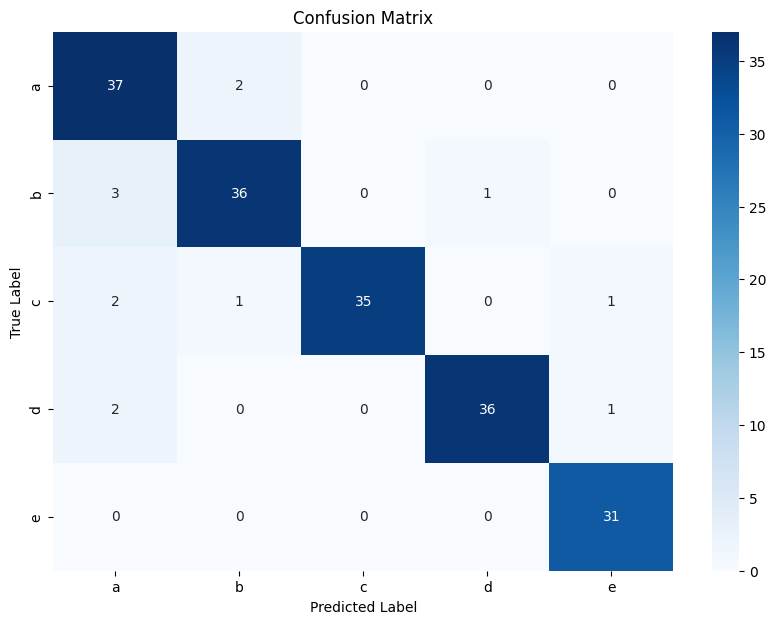


Misclassification Rates:
True: a, Predicted: b -> Rate: 0.02
True: a, Predicted: c -> Rate: 0.00
True: a, Predicted: d -> Rate: 0.02
True: a, Predicted: e -> Rate: 0.00
True: b, Predicted: a -> Rate: 0.11
True: b, Predicted: c -> Rate: 0.00
True: b, Predicted: d -> Rate: 0.00
True: b, Predicted: e -> Rate: 0.00
True: c, Predicted: a -> Rate: 0.10
True: c, Predicted: b -> Rate: 0.05
True: c, Predicted: d -> Rate: 0.00
True: c, Predicted: e -> Rate: 0.02
True: d, Predicted: a -> Rate: 0.09
True: d, Predicted: b -> Rate: 0.02
True: d, Predicted: c -> Rate: 0.02
True: d, Predicted: e -> Rate: 0.02
True: e, Predicted: a -> Rate: 0.00
True: e, Predicted: b -> Rate: 0.00
True: e, Predicted: c -> Rate: 0.00
True: e, Predicted: d -> Rate: 0.00


In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(mean_confusion_matrix_rounded, annot=True, fmt='d', cmap='Blues', xticklabels=train_df['label'].unique(), yticklabels=train_df['label'].unique())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
# Quantitative Analysis: Calculate misclassification rates
misclassifications = {}
labels =['a','b','c','d','e']
for i, true_label in enumerate(labels):
    for j, pred_label in enumerate(labels):
        if i != j:
            misclassifications[(true_label, pred_label)] = conf_matrix[i, j] / conf_matrix[i].sum()

# Print misclassification rates
print("\nMisclassification Rates:")
for (true_label, pred_label), rate in misclassifications.items():
    print(f"True: {true_label}, Predicted: {pred_label} -> Rate: {rate:.2f}")

           Average
Precision    0.922
Recall       0.920
F1-score     0.916


<ipython-input-177-490111ec79fc>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=averages_df_percentage.index, y='Average', data=averages_df_percentage, palette=colors)


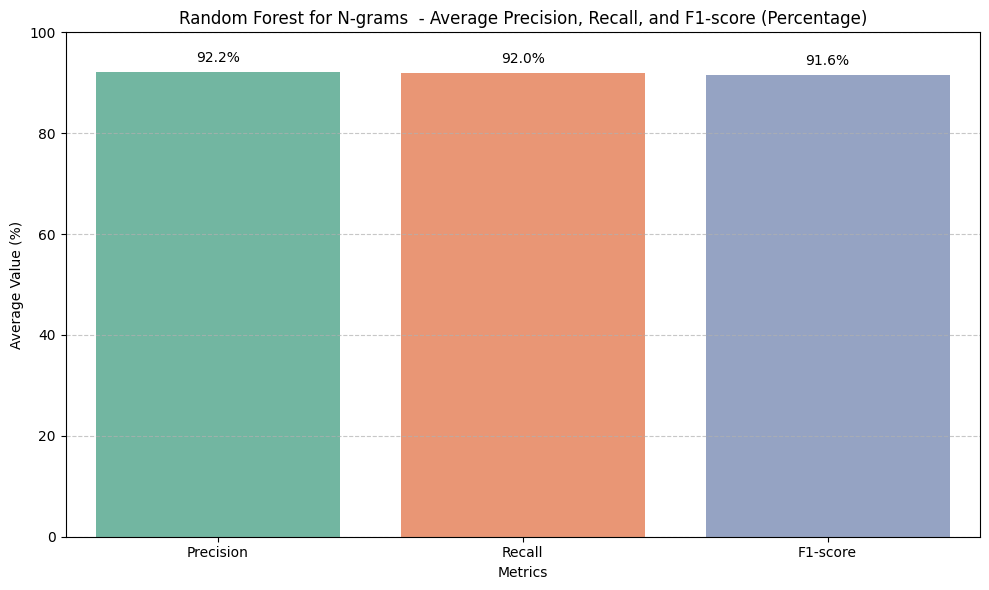

In [ ]:
generateAveragePlot(results9_df,"Random Forest for N-grams ")

Classification k-nearest neighbor for BoW

In [ ]:
accuracy_scores = []
classification_reports = []
confusion_matrices = []

for train_index, test_index in kf.split(df):
    train_df, test_df = df.iloc[train_index], df.iloc[test_index]
    X_train_bow, X_test_bow = bowDataSet(train_df, test_df)

    # Initialize the k-NN classifier with a chosen value for k (e.g., k=5)
    knn_classifier = KNeighborsClassifier(n_neighbors=5)

    # Fit the classifier on the training data
    knn_classifier.fit(X_train_bow, train_df['label'])

    # Predict on the test data
    y_pred_bow_knn = knn_classifier.predict(X_test_bow)

    # Calculate accuracy
    accuracy_knn_bow = accuracy_score(test_df['label'], y_pred_bow_knn)
    accuracy_scores.append(accuracy_knn_bow)

    ## Store the classification report
    classification_rep = classification_report(test_df['label'], y_pred_bow_knn, output_dict=True)
    classification_reports.append(classification_rep)

    # Store the confusion matrix
    conf_matrix = confusion_matrix(test_df['label'], y_pred_bow_knn)
    confusion_matrices.append(conf_matrix)

# Calculate mean accuracy and round it
mean_accuracy = np.mean(accuracy_scores)
mean_accuracy_rounded = round(mean_accuracy, 2)
print("Mean Accuracy:", mean_accuracy_rounded)

# Calculate mean classification report and round metrics
mean_classification_report = {}
for cls in classification_reports[0].keys():
    if cls not in ['accuracy', 'macro avg', 'weighted avg']:
        precision = np.mean([report[cls]['precision'] for report in classification_reports])
        recall = np.mean([report[cls]['recall'] for report in classification_reports])
        f1_score = np.mean([report[cls]['f1-score'] for report in classification_reports])
        mean_classification_report[cls] = {
            'Precision': round(precision, 2),
            'Recall': round(recall, 2),
            'F1-score': round(f1_score, 2)
        }
results10_df = pd.DataFrame.from_dict(mean_classification_report, orient='index')
print("\nMean k-nearest neighbor Classification Report for BoW:\n", results10_df)

# Calculate mean confusion matrix and round it
mean_confusion_matrix = np.mean(confusion_matrices, axis=0)
mean_confusion_matrix_rounded = np.round(mean_confusion_matrix).astype(int)
print("\nMean Confusion Matrix:\n", mean_confusion_matrix_rounded)

BoW Training DataFrame shape: (1720, 19896)
BoW Testing DataFrame shape: (192, 19896)
BoW Training DataFrame shape: (1720, 20141)
BoW Testing DataFrame shape: (192, 20141)
BoW Training DataFrame shape: (1721, 19924)
BoW Testing DataFrame shape: (191, 19924)
BoW Training DataFrame shape: (1721, 20036)
BoW Testing DataFrame shape: (191, 20036)
BoW Training DataFrame shape: (1721, 20037)
BoW Testing DataFrame shape: (191, 20037)
BoW Training DataFrame shape: (1721, 20085)
BoW Testing DataFrame shape: (191, 20085)
BoW Training DataFrame shape: (1721, 19898)
BoW Testing DataFrame shape: (191, 19898)
BoW Training DataFrame shape: (1721, 20176)
BoW Testing DataFrame shape: (191, 20176)
BoW Training DataFrame shape: (1721, 20065)
BoW Testing DataFrame shape: (191, 20065)
BoW Training DataFrame shape: (1721, 19885)
BoW Testing DataFrame shape: (191, 19885)
Mean Accuracy: 0.45

Mean k-nearest neighbor Classification Report for BoW:
    Precision  Recall  F1-score
a       0.29    0.98      0.45
b

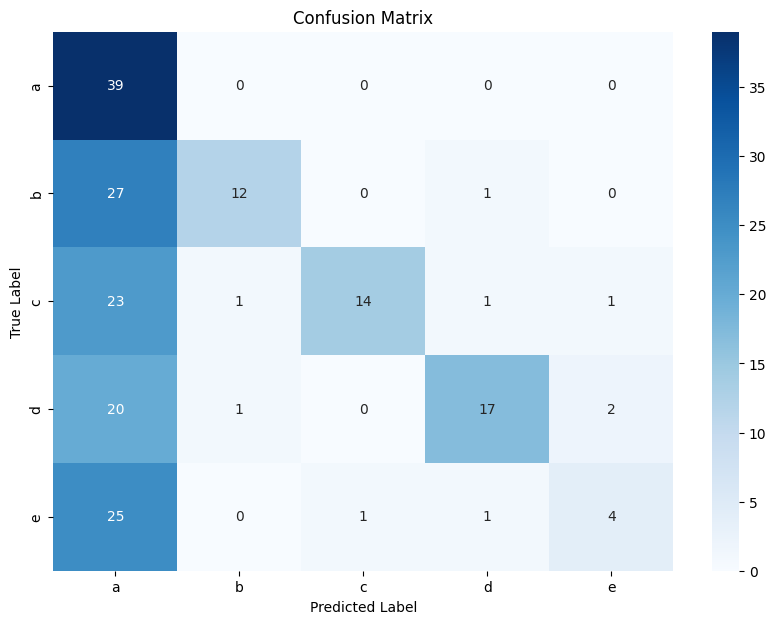


Misclassification Rates:
True: a, Predicted: b -> Rate: 0.00
True: a, Predicted: c -> Rate: 0.00
True: a, Predicted: d -> Rate: 0.00
True: a, Predicted: e -> Rate: 0.00
True: b, Predicted: a -> Rate: 0.84
True: b, Predicted: c -> Rate: 0.00
True: b, Predicted: d -> Rate: 0.00
True: b, Predicted: e -> Rate: 0.00
True: c, Predicted: a -> Rate: 0.59
True: c, Predicted: b -> Rate: 0.00
True: c, Predicted: d -> Rate: 0.02
True: c, Predicted: e -> Rate: 0.05
True: d, Predicted: a -> Rate: 0.53
True: d, Predicted: b -> Rate: 0.00
True: d, Predicted: c -> Rate: 0.05
True: d, Predicted: e -> Rate: 0.05
True: e, Predicted: a -> Rate: 0.64
True: e, Predicted: b -> Rate: 0.00
True: e, Predicted: c -> Rate: 0.20
True: e, Predicted: d -> Rate: 0.00


In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(mean_confusion_matrix_rounded, annot=True, fmt='d', cmap='Blues', xticklabels=train_df['label'].unique(), yticklabels=train_df['label'].unique())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
# Quantitative Analysis: Calculate misclassification rates
misclassifications = {}
labels =['a','b','c','d','e']
for i, true_label in enumerate(labels):
    for j, pred_label in enumerate(labels):
        if i != j:
            misclassifications[(true_label, pred_label)] = conf_matrix[i, j] / conf_matrix[i].sum()

# Print misclassification rates
print("\nMisclassification Rates:")
for (true_label, pred_label), rate in misclassifications.items():
    print(f"True: {true_label}, Predicted: {pred_label} -> Rate: {rate:.2f}")

           Average
Precision    0.700
Recall       0.442
F1-score     0.436


<ipython-input-177-490111ec79fc>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=averages_df_percentage.index, y='Average', data=averages_df_percentage, palette=colors)


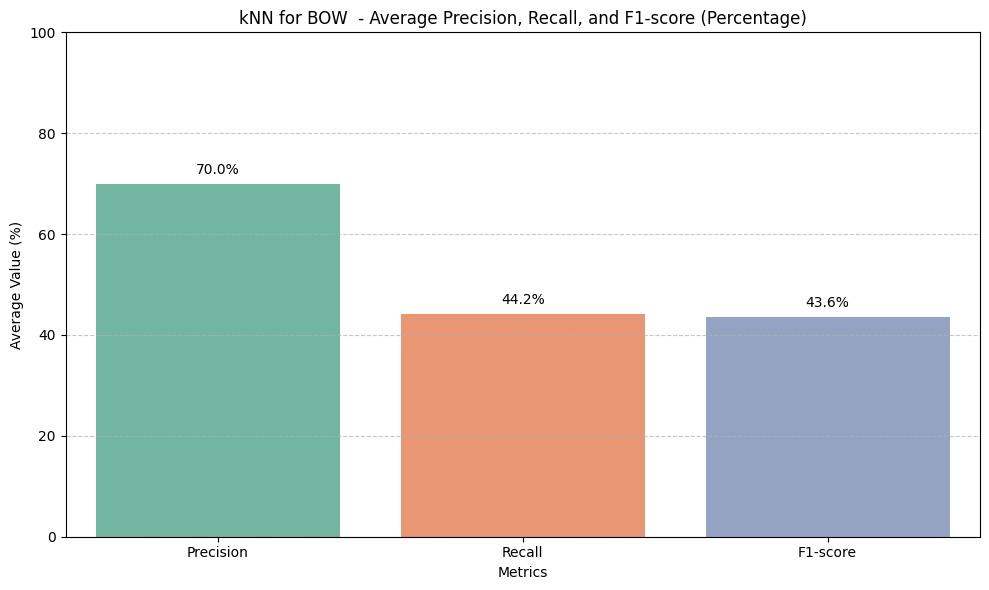

In [ ]:
generateAveragePlot(results10_df,"kNN for BOW ")

Classification k-nearest neighbor for Tf-IDF


In [ ]:
accuracy_scores = []
classification_reports = []
confusion_matrices = []
for train_index, test_index in kf.split(df):
    train_df, test_df = df.iloc[train_index], df.iloc[test_index]

    X_train_tfidf, X_test_tfidf = TFIDFDataSet(train_df, test_df)

    # Initialize the k-NN classifier with a chosen value for k (e.g., k=5)
    knn_classifier = KNeighborsClassifier(n_neighbors=5)

    # Fit the classifier on the training data using TF-IDF features
    knn_classifier.fit(X_train_tfidf, train_df['label'])

    # Predict on the test data using TF-IDF features
    y_pred_tfidf_knn = knn_classifier.predict(X_test_tfidf)

    # Calculate accuracy
    accuracy_knn_tfidf = accuracy_score(test_df['label'], y_pred_tfidf_knn)
    accuracy_scores.append(accuracy_knn_tfidf)

    ## Store the classification report
    classification_rep = classification_report(test_df['label'], y_pred_tfidf_knn, output_dict=True)
    classification_reports.append(classification_rep)

    # Store the confusion matrix
    conf_matrix = confusion_matrix(test_df['label'], y_pred_tfidf_knn)
    confusion_matrices.append(conf_matrix)

# Calculate mean accuracy and round it
mean_accuracy = np.mean(accuracy_scores)
mean_accuracy_rounded = round(mean_accuracy, 2)
print("Mean Accuracy:", mean_accuracy_rounded)

# Calculate mean classification report and round metrics
mean_classification_report = {}
for cls in classification_reports[0].keys():
    if cls not in ['accuracy', 'macro avg', 'weighted avg']:
        precision = np.mean([report[cls]['precision'] for report in classification_reports])
        recall = np.mean([report[cls]['recall'] for report in classification_reports])
        f1_score = np.mean([report[cls]['f1-score'] for report in classification_reports])
        mean_classification_report[cls] = {
            'Precision': round(precision, 2),
            'Recall': round(recall, 2),
            'F1-score': round(f1_score, 2)
        }
results11_df = pd.DataFrame.from_dict(mean_classification_report, orient='index')
print("\nMean k-nearest neighbor Classification Report for Tf-IDF:\n", results11_df)

# Calculate mean confusion matrix and round it
mean_confusion_matrix = np.mean(confusion_matrices, axis=0)
mean_confusion_matrix_rounded = np.round(mean_confusion_matrix).astype(int)
print("\nMean Confusion Matrix:\n", mean_confusion_matrix_rounded)

TF-IDF Training DataFrame shape: (1720, 19896)
TF-IDF Testing DataFrame shape: (192, 19896)
TF-IDF Training DataFrame shape: (1720, 20141)
TF-IDF Testing DataFrame shape: (192, 20141)
TF-IDF Training DataFrame shape: (1721, 19924)
TF-IDF Testing DataFrame shape: (191, 19924)
TF-IDF Training DataFrame shape: (1721, 20036)
TF-IDF Testing DataFrame shape: (191, 20036)
TF-IDF Training DataFrame shape: (1721, 20037)
TF-IDF Testing DataFrame shape: (191, 20037)
TF-IDF Training DataFrame shape: (1721, 20085)
TF-IDF Testing DataFrame shape: (191, 20085)
TF-IDF Training DataFrame shape: (1721, 19898)
TF-IDF Testing DataFrame shape: (191, 19898)
TF-IDF Training DataFrame shape: (1721, 20176)
TF-IDF Testing DataFrame shape: (191, 20176)
TF-IDF Training DataFrame shape: (1721, 20065)
TF-IDF Testing DataFrame shape: (191, 20065)
TF-IDF Training DataFrame shape: (1721, 19885)
TF-IDF Testing DataFrame shape: (191, 19885)
Mean Accuracy: 0.88

Mean k-nearest neighbor Classification Report for Tf-IDF:
 

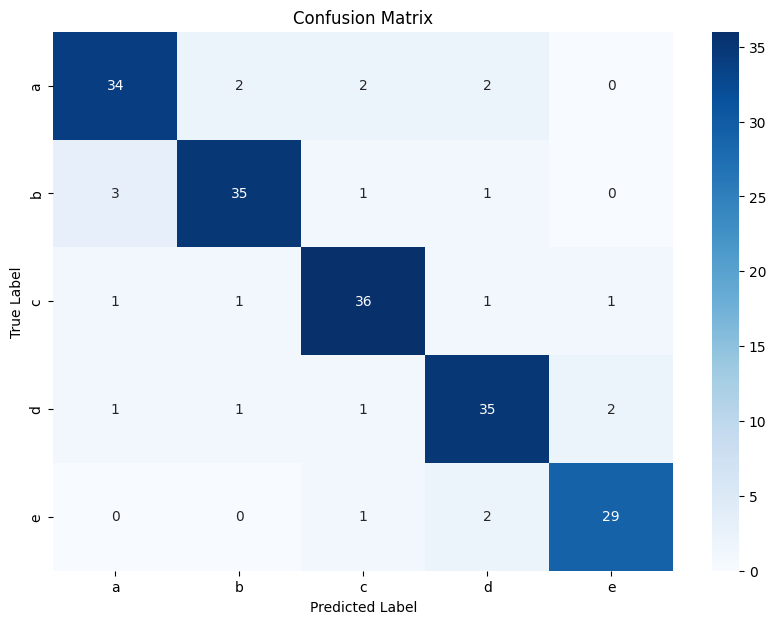


Misclassification Rates:
True: a, Predicted: b -> Rate: 0.04
True: a, Predicted: c -> Rate: 0.04
True: a, Predicted: d -> Rate: 0.04
True: a, Predicted: e -> Rate: 0.00
True: b, Predicted: a -> Rate: 0.03
True: b, Predicted: c -> Rate: 0.03
True: b, Predicted: d -> Rate: 0.00
True: b, Predicted: e -> Rate: 0.00
True: c, Predicted: a -> Rate: 0.00
True: c, Predicted: b -> Rate: 0.05
True: c, Predicted: d -> Rate: 0.00
True: c, Predicted: e -> Rate: 0.05
True: d, Predicted: a -> Rate: 0.07
True: d, Predicted: b -> Rate: 0.02
True: d, Predicted: c -> Rate: 0.07
True: d, Predicted: e -> Rate: 0.05
True: e, Predicted: a -> Rate: 0.00
True: e, Predicted: b -> Rate: 0.00
True: e, Predicted: c -> Rate: 0.12
True: e, Predicted: d -> Rate: 0.00


In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(mean_confusion_matrix_rounded, annot=True, fmt='d', cmap='Blues', xticklabels=train_df['label'].unique(), yticklabels=train_df['label'].unique())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
# Quantitative Analysis: Calculate misclassification rates
misclassifications = {}
labels =['a','b','c','d','e']
for i, true_label in enumerate(labels):
    for j, pred_label in enumerate(labels):
        if i != j:
            misclassifications[(true_label, pred_label)] = conf_matrix[i, j] / conf_matrix[i].sum()

# Print misclassification rates
print("\nMisclassification Rates:")
for (true_label, pred_label), rate in misclassifications.items():
    print(f"True: {true_label}, Predicted: {pred_label} -> Rate: {rate:.2f}")

           Average
Precision    0.880
Recall       0.880
F1-score     0.878


<ipython-input-177-490111ec79fc>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=averages_df_percentage.index, y='Average', data=averages_df_percentage, palette=colors)


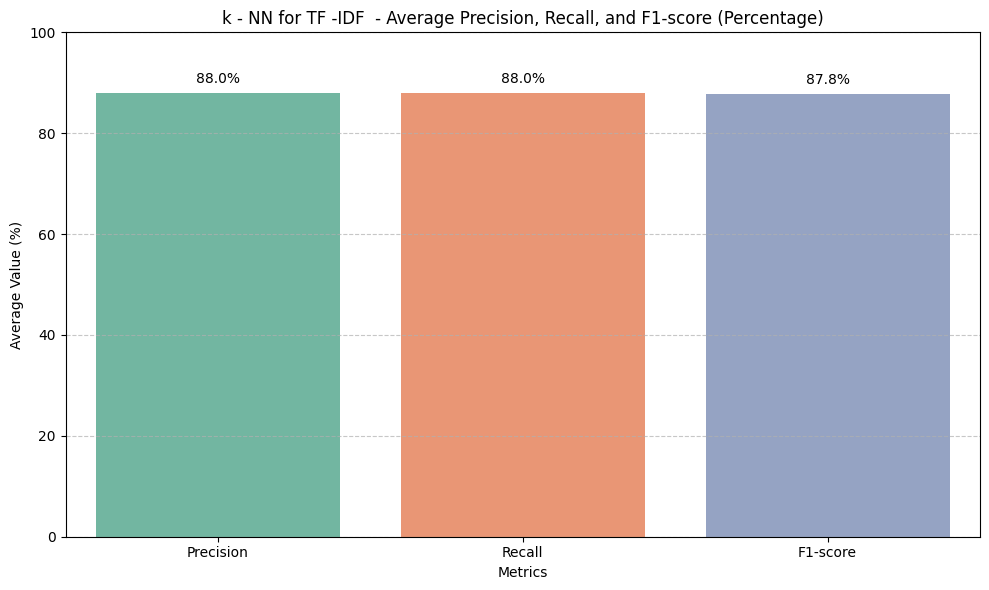

In [ ]:
generateAveragePlot(results11_df,"k - NN for TF -IDF ")

Classification K Nearest Neighbour for N - Grams

In [ ]:
accuracy_scores = []
classification_reports = []
confusion_matrices = []

for train_index, test_index in kf.split(df):
    train_df, test_df = df.iloc[train_index], df.iloc[test_index]
    X_train_ngrams, X_test_ngrams = NgramsDataSet(train_df, test_df)

    # Initialize the k-NN classifier with a chosen value for k (e.g., k=5)
    knn_classifier = KNeighborsClassifier(n_neighbors=5)

    # Fit the classifier on the training data using N-Grams features
    knn_classifier.fit(X_train_ngrams, train_df['label'])

    # Predict on the test data using N-Grams features
    y_pred_ngrams_knn = knn_classifier.predict(X_test_ngrams)

    # Calculate accuracy
    accuracy_knn_ngrams = accuracy_score(test_df['label'], y_pred_ngrams_knn)
    accuracy_scores.append(accuracy_knn_ngrams)

    ## Store the classification report
    classification_rep = classification_report(test_df['label'], y_pred_ngrams_knn, output_dict=True)
    classification_reports.append(classification_rep)

    # Store the confusion matrix
    conf_matrix = confusion_matrix(test_df['label'], y_pred_ngrams_knn)
    confusion_matrices.append(conf_matrix)

# Calculate mean accuracy and round it
mean_accuracy = np.mean(accuracy_scores)
mean_accuracy_rounded = round(mean_accuracy, 2)
print("Mean Accuracy:", mean_accuracy_rounded)

# Calculate mean classification report and round metrics
mean_classification_report = {}
for cls in classification_reports[0].keys():
    if cls not in ['accuracy', 'macro avg', 'weighted avg']:
        precision = np.mean([report[cls]['precision'] for report in classification_reports])
        recall = np.mean([report[cls]['recall'] for report in classification_reports])
        f1_score = np.mean([report[cls]['f1-score'] for report in classification_reports])
        mean_classification_report[cls] = {
            'Precision': round(precision, 2),
            'Recall': round(recall, 2),
            'F1-score': round(f1_score, 2)
        }
results12_df = pd.DataFrame.from_dict(mean_classification_report, orient='index')
print("\nMean k-nearest neighbor Classification Report for BoW:\n", results12_df)

# Calculate mean confusion matrix and round it
mean_confusion_matrix = np.mean(confusion_matrices, axis=0)
mean_confusion_matrix_rounded = np.round(mean_confusion_matrix).astype(int)
print("\nMean Confusion Matrix:\n", mean_confusion_matrix_rounded)

Shape of X_train_ngrams: (1720, 84996)
Shape of X_test_ngrams: (192, 84996)
Shape of X_train_ngrams: (1720, 85345)
Shape of X_test_ngrams: (192, 85345)
Shape of X_train_ngrams: (1721, 85151)
Shape of X_test_ngrams: (191, 85151)
Shape of X_train_ngrams: (1721, 85080)
Shape of X_test_ngrams: (191, 85080)
Shape of X_train_ngrams: (1721, 85303)
Shape of X_test_ngrams: (191, 85303)
Shape of X_train_ngrams: (1721, 84928)
Shape of X_test_ngrams: (191, 84928)
Shape of X_train_ngrams: (1721, 85128)
Shape of X_test_ngrams: (191, 85128)
Shape of X_train_ngrams: (1721, 85682)
Shape of X_test_ngrams: (191, 85682)
Shape of X_train_ngrams: (1721, 84962)
Shape of X_test_ngrams: (191, 84962)
Shape of X_train_ngrams: (1721, 84555)
Shape of X_test_ngrams: (191, 84555)
Mean Accuracy: 0.43

Mean k-nearest neighbor Classification Report for BoW:
    Precision  Recall  F1-score
a       0.29    0.99      0.45
b       0.89    0.24      0.37
c       0.63    0.11      0.19
d       0.75    0.19      0.30
e       

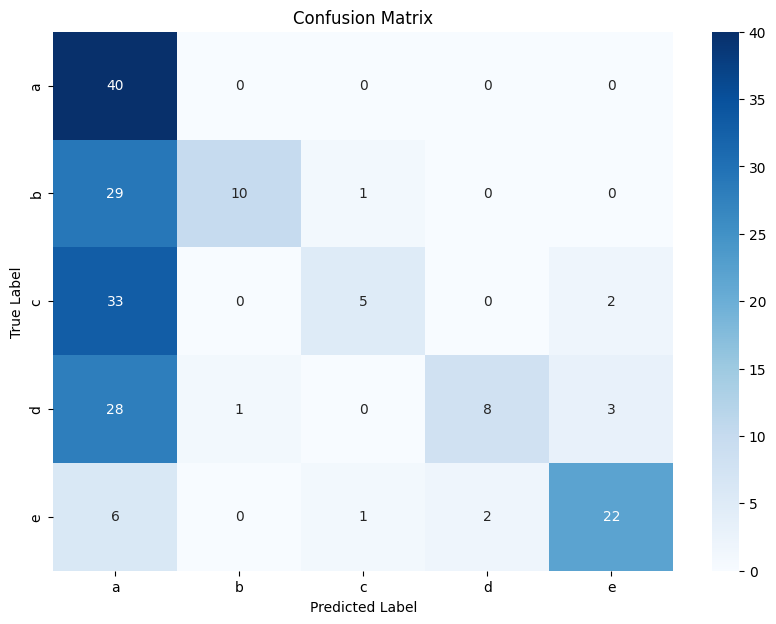


Misclassification Rates:
True: a, Predicted: b -> Rate: 0.00
True: a, Predicted: c -> Rate: 0.00
True: a, Predicted: d -> Rate: 0.00
True: a, Predicted: e -> Rate: 0.00
True: b, Predicted: a -> Rate: 0.78
True: b, Predicted: c -> Rate: 0.00
True: b, Predicted: d -> Rate: 0.00
True: b, Predicted: e -> Rate: 0.03
True: c, Predicted: a -> Rate: 0.83
True: c, Predicted: b -> Rate: 0.00
True: c, Predicted: d -> Rate: 0.00
True: c, Predicted: e -> Rate: 0.07
True: d, Predicted: a -> Rate: 0.67
True: d, Predicted: b -> Rate: 0.00
True: d, Predicted: c -> Rate: 0.00
True: d, Predicted: e -> Rate: 0.07
True: e, Predicted: a -> Rate: 0.16
True: e, Predicted: b -> Rate: 0.00
True: e, Predicted: c -> Rate: 0.20
True: e, Predicted: d -> Rate: 0.04


In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(mean_confusion_matrix_rounded, annot=True, fmt='d', cmap='Blues', xticklabels=train_df['label'].unique(), yticklabels=train_df['label'].unique())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
# Quantitative Analysis: Calculate misclassification rates
misclassifications = {}
labels =['a','b','c','d','e']
for i, true_label in enumerate(labels):
    for j, pred_label in enumerate(labels):
        if i != j:
            misclassifications[(true_label, pred_label)] = conf_matrix[i, j] / conf_matrix[i].sum()

# Print misclassification rates
print("\nMisclassification Rates:")
for (true_label, pred_label), rate in misclassifications.items():
    print(f"True: {true_label}, Predicted: {pred_label} -> Rate: {rate:.2f}")

           Average
Precision    0.666
Recall       0.446
F1-score     0.398


<ipython-input-177-490111ec79fc>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=averages_df_percentage.index, y='Average', data=averages_df_percentage, palette=colors)


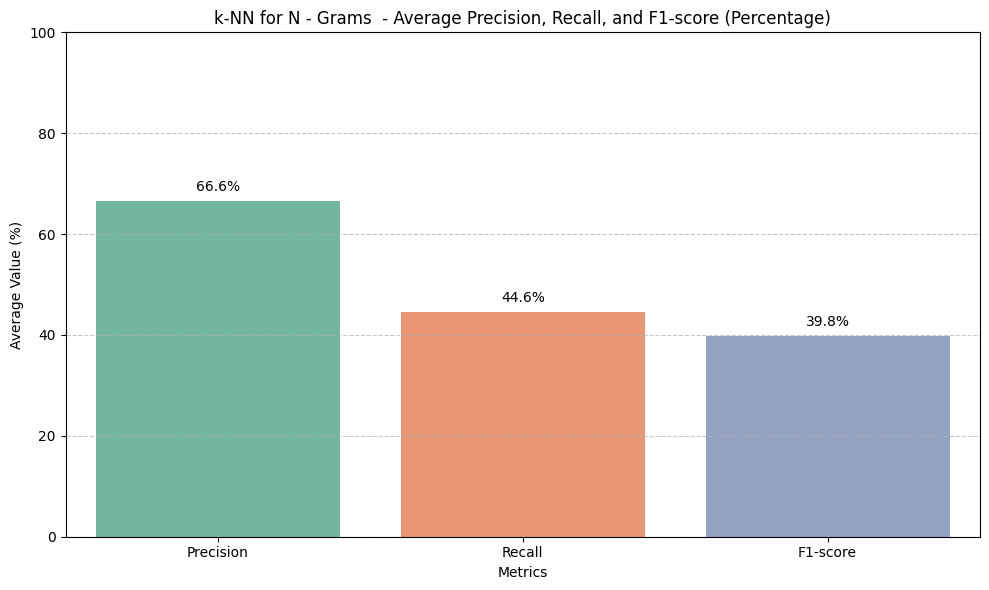

In [ ]:
generateAveragePlot(results12_df,"k-NN for N - Grams ")

Classification SGD for BoW

In [ ]:
from sklearn.linear_model import SGDClassifier

accuracy_scores = []
classification_reports = []
confusion_matrices = []

for train_index, test_index in kf.split(df):
    train_df, test_df = df.iloc[train_index], df.iloc[test_index]
    X_train_bow, X_test_bow = bowDataSet(train_df, test_df)

    # Initialize the SGD classifier
    sgd_classifier = SGDClassifier(random_state=42)

    # Fit the model on the training data
    sgd_classifier.fit(X_train_bow, train_df['label'])

    # Predict on the test data
    y_pred_bow_sgd = sgd_classifier.predict(X_test_bow)

    # Calculate accuracy
    accuracy_sgd_bow = accuracy_score(test_df['label'], y_pred_bow_sgd)
    accuracy_scores.append(accuracy_sgd_bow)

    ## Store the classification report
    classification_rep = classification_report(test_df['label'], y_pred_bow_sgd, output_dict=True)
    classification_reports.append(classification_rep)

    # Store the confusion matrix
    conf_matrix = confusion_matrix(test_df['label'], y_pred_bow_sgd)
    confusion_matrices.append(conf_matrix)

# Calculate mean accuracy and round it
mean_accuracy = np.mean(accuracy_scores)
mean_accuracy_rounded = round(mean_accuracy, 2)
print("Mean Accuracy:", mean_accuracy_rounded)

# Calculate mean classification report and round metrics
mean_classification_report = {}
for cls in classification_reports[0].keys():
    if cls not in ['accuracy', 'macro avg', 'weighted avg']:
        precision = np.mean([report[cls]['precision'] for report in classification_reports])
        recall = np.mean([report[cls]['recall'] for report in classification_reports])
        f1_score = np.mean([report[cls]['f1-score'] for report in classification_reports])
        mean_classification_report[cls] = {
            'Precision': round(precision, 2),
            'Recall': round(recall, 2),
            'F1-score': round(f1_score, 2)
        }
results13_df = pd.DataFrame.from_dict(mean_classification_report, orient='index')
print("\n NSGD Classification Report for BoW:\n", results13_df)

# Calculate mean confusion matrix and round it
mean_confusion_matrix = np.mean(confusion_matrices, axis=0)
mean_confusion_matrix_rounded = np.round(mean_confusion_matrix).astype(int)
print("\nMean Confusion Matrix:\n", mean_confusion_matrix_rounded)

BoW Training DataFrame shape: (1720, 19896)
BoW Testing DataFrame shape: (192, 19896)
BoW Training DataFrame shape: (1720, 20141)
BoW Testing DataFrame shape: (192, 20141)
BoW Training DataFrame shape: (1721, 19924)
BoW Testing DataFrame shape: (191, 19924)
BoW Training DataFrame shape: (1721, 20036)
BoW Testing DataFrame shape: (191, 20036)
BoW Training DataFrame shape: (1721, 20037)
BoW Testing DataFrame shape: (191, 20037)
BoW Training DataFrame shape: (1721, 20085)
BoW Testing DataFrame shape: (191, 20085)
BoW Training DataFrame shape: (1721, 19898)
BoW Testing DataFrame shape: (191, 19898)
BoW Training DataFrame shape: (1721, 20176)
BoW Testing DataFrame shape: (191, 20176)
BoW Training DataFrame shape: (1721, 20065)
BoW Testing DataFrame shape: (191, 20065)
BoW Training DataFrame shape: (1721, 19885)
BoW Testing DataFrame shape: (191, 19885)
Mean Accuracy: 0.91

 NSGD Classification Report for BoW:
    Precision  Recall  F1-score
a       0.86    0.93      0.89
b       0.92    0.8

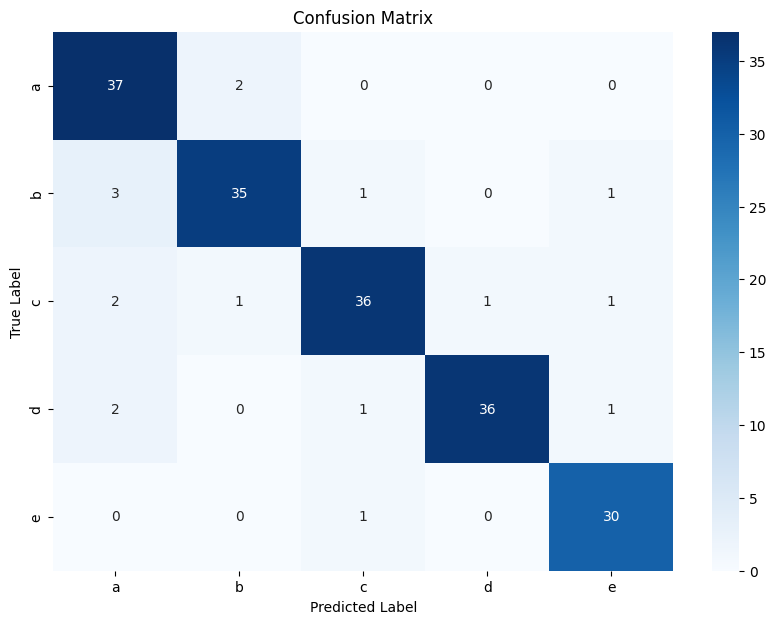


Misclassification Rates:
True: a, Predicted: b -> Rate: 0.02
True: a, Predicted: c -> Rate: 0.00
True: a, Predicted: d -> Rate: 0.00
True: a, Predicted: e -> Rate: 0.00
True: b, Predicted: a -> Rate: 0.11
True: b, Predicted: c -> Rate: 0.00
True: b, Predicted: d -> Rate: 0.00
True: b, Predicted: e -> Rate: 0.05
True: c, Predicted: a -> Rate: 0.05
True: c, Predicted: b -> Rate: 0.02
True: c, Predicted: d -> Rate: 0.00
True: c, Predicted: e -> Rate: 0.02
True: d, Predicted: a -> Rate: 0.09
True: d, Predicted: b -> Rate: 0.00
True: d, Predicted: c -> Rate: 0.05
True: d, Predicted: e -> Rate: 0.02
True: e, Predicted: a -> Rate: 0.00
True: e, Predicted: b -> Rate: 0.00
True: e, Predicted: c -> Rate: 0.16
True: e, Predicted: d -> Rate: 0.00


In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(mean_confusion_matrix_rounded, annot=True, fmt='d', cmap='Blues', xticklabels=train_df['label'].unique(), yticklabels=train_df['label'].unique())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
# Quantitative Analysis: Calculate misclassification rates
misclassifications = {}
labels =['a','b','c','d','e']
for i, true_label in enumerate(labels):
    for j, pred_label in enumerate(labels):
        if i != j:
            misclassifications[(true_label, pred_label)] = conf_matrix[i, j] / conf_matrix[i].sum()

# Print misclassification rates
print("\nMisclassification Rates:")
for (true_label, pred_label), rate in misclassifications.items():
    print(f"True: {true_label}, Predicted: {pred_label} -> Rate: {rate:.2f}")

           Average
Precision    0.910
Recall       0.912
F1-score     0.910


<ipython-input-177-490111ec79fc>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=averages_df_percentage.index, y='Average', data=averages_df_percentage, palette=colors)


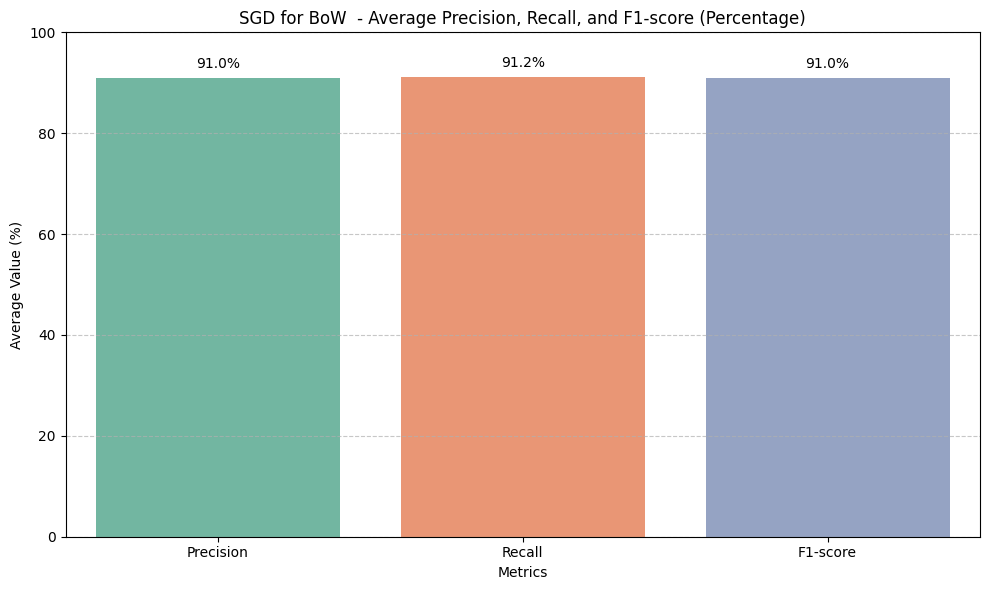

In [ ]:
generateAveragePlot(results13_df,"SGD for BoW ")

Classification SGD for TF-IDF

In [ ]:
accuracy_scores = []
classification_reports = []
confusion_matrices = []

for train_index, test_index in kf.split(df):
    train_df, test_df = df.iloc[train_index], df.iloc[test_index]
    X_train_tfidf, X_test_tfidf = TFIDFDataSet(train_df, test_df)


    # Initialize the SGD classifier
    sgd_classifier = SGDClassifier(random_state=42)

    # Fit the model on the training data
    sgd_classifier.fit(X_train_tfidf, train_df['label'])

    # Predict on the test data
    y_pred_tfidf_sgd = sgd_classifier.predict(X_test_tfidf)

    # Calculate accuracy
    accuracy_sgd = accuracy_score(test_df['label'], y_pred_tfidf_sgd)
    accuracy_scores.append(accuracy_sgd)

    ## Store the classification report
    classification_rep = classification_report(test_df['label'], y_pred_tfidf_sgd, output_dict=True)
    classification_reports.append(classification_rep)

    # Store the confusion matrix
    conf_matrix = confusion_matrix(test_df['label'], y_pred_tfidf_sgd)
    confusion_matrices.append(conf_matrix)

# Calculate mean accuracy and round it
mean_accuracy = np.mean(accuracy_scores)
mean_accuracy_rounded = round(mean_accuracy, 2)
print("Mean Accuracy:", mean_accuracy_rounded)

# Calculate mean classification report and round metrics
mean_classification_report = {}
for cls in classification_reports[0].keys():
    if cls not in ['accuracy', 'macro avg', 'weighted avg']:
        precision = np.mean([report[cls]['precision'] for report in classification_reports])
        recall = np.mean([report[cls]['recall'] for report in classification_reports])
        f1_score = np.mean([report[cls]['f1-score'] for report in classification_reports])
        mean_classification_report[cls] = {
            'Precision': round(precision, 2),
            'Recall': round(recall, 2),
            'F1-score': round(f1_score, 2)
        }
results14_df = pd.DataFrame.from_dict(mean_classification_report, orient='index')
print("\nMean SGD Classification Report for TF-IDF:\n", results14_df)

# Calculate mean confusion matrix and round it
mean_confusion_matrix = np.mean(confusion_matrices, axis=0)
mean_confusion_matrix_rounded = np.round(mean_confusion_matrix).astype(int)
print("\nMean Confusion Matrix:\n", mean_confusion_matrix_rounded)

TF-IDF Training DataFrame shape: (1720, 19896)
TF-IDF Testing DataFrame shape: (192, 19896)
TF-IDF Training DataFrame shape: (1720, 20141)
TF-IDF Testing DataFrame shape: (192, 20141)
TF-IDF Training DataFrame shape: (1721, 19924)
TF-IDF Testing DataFrame shape: (191, 19924)
TF-IDF Training DataFrame shape: (1721, 20036)
TF-IDF Testing DataFrame shape: (191, 20036)
TF-IDF Training DataFrame shape: (1721, 20037)
TF-IDF Testing DataFrame shape: (191, 20037)
TF-IDF Training DataFrame shape: (1721, 20085)
TF-IDF Testing DataFrame shape: (191, 20085)
TF-IDF Training DataFrame shape: (1721, 19898)
TF-IDF Testing DataFrame shape: (191, 19898)
TF-IDF Training DataFrame shape: (1721, 20176)
TF-IDF Testing DataFrame shape: (191, 20176)
TF-IDF Training DataFrame shape: (1721, 20065)
TF-IDF Testing DataFrame shape: (191, 20065)
TF-IDF Training DataFrame shape: (1721, 19885)
TF-IDF Testing DataFrame shape: (191, 19885)
Mean Accuracy: 0.95

Mean SGD Classification Report for TF-IDF:
    Precision  R

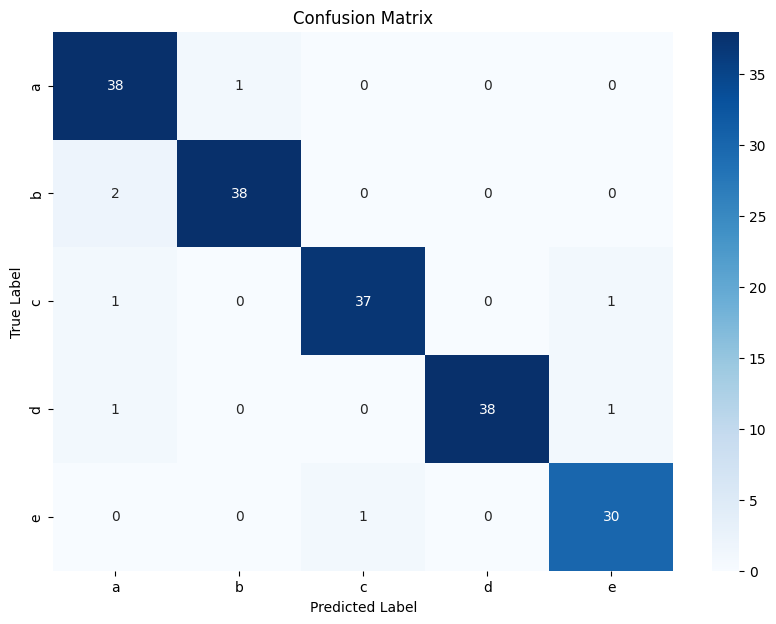


Misclassification Rates:
True: a, Predicted: b -> Rate: 0.04
True: a, Predicted: c -> Rate: 0.00
True: a, Predicted: d -> Rate: 0.00
True: a, Predicted: e -> Rate: 0.00
True: b, Predicted: a -> Rate: 0.03
True: b, Predicted: c -> Rate: 0.00
True: b, Predicted: d -> Rate: 0.00
True: b, Predicted: e -> Rate: 0.00
True: c, Predicted: a -> Rate: 0.02
True: c, Predicted: b -> Rate: 0.02
True: c, Predicted: d -> Rate: 0.00
True: c, Predicted: e -> Rate: 0.02
True: d, Predicted: a -> Rate: 0.05
True: d, Predicted: b -> Rate: 0.00
True: d, Predicted: c -> Rate: 0.05
True: d, Predicted: e -> Rate: 0.02
True: e, Predicted: a -> Rate: 0.00
True: e, Predicted: b -> Rate: 0.00
True: e, Predicted: c -> Rate: 0.08
True: e, Predicted: d -> Rate: 0.00


In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(mean_confusion_matrix_rounded, annot=True, fmt='d', cmap='Blues', xticklabels=train_df['label'].unique(), yticklabels=train_df['label'].unique())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
# Quantitative Analysis: Calculate misclassification rates
misclassifications = {}
labels =['a','b','c','d','e']
for i, true_label in enumerate(labels):
    for j, pred_label in enumerate(labels):
        if i != j:
            misclassifications[(true_label, pred_label)] = conf_matrix[i, j] / conf_matrix[i].sum()

# Print misclassification rates
print("\nMisclassification Rates:")
for (true_label, pred_label), rate in misclassifications.items():
    print(f"True: {true_label}, Predicted: {pred_label} -> Rate: {rate:.2f}")

           Average
Precision    0.946
Recall       0.946
F1-score     0.948


<ipython-input-177-490111ec79fc>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=averages_df_percentage.index, y='Average', data=averages_df_percentage, palette=colors)


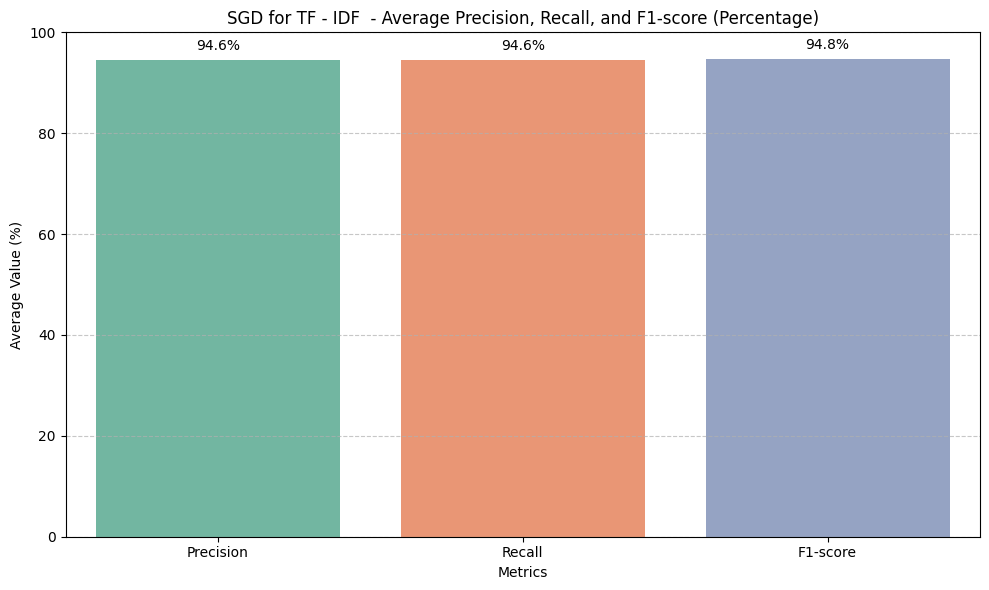

In [ ]:
generateAveragePlot(results14_df,"SGD for TF - IDF ")

**CLassification SGD for N-grams**

In [ ]:
accuracy_scores = []
classification_reports = []
confusion_matrices = []

for train_index, test_index in kf.split(df):
    train_df, test_df = df.iloc[train_index], df.iloc[test_index]
    X_train_ngrams, X_test_ngrams = NgramsDataSet(train_df, test_df)

    # Initialize the SGD classifier
    sgd_classifier = SGDClassifier(random_state=42)

    # Fit the model on the training data
    sgd_classifier.fit(X_train_ngrams, train_df['label'])

    # Predict on the test data
    y_pred_ngrams_sgd = sgd_classifier.predict(X_test_ngrams)

    # Calculate accuracy
    accuracy_sgd_ngrams = accuracy_score(test_df['label'], y_pred_ngrams_sgd)
    accuracy_scores.append(accuracy_sgd_ngrams)

    ## Store the classification report
    classification_rep = classification_report(test_df['label'], y_pred_ngrams_sgd, output_dict=True)
    classification_reports.append(classification_rep)

    # Store the confusion matrix
    conf_matrix = confusion_matrix(test_df['label'], y_pred_ngrams_sgd)
    confusion_matrices.append(conf_matrix)

# Calculate mean accuracy and round it
mean_accuracy = np.mean(accuracy_scores)
mean_accuracy_rounded = round(mean_accuracy, 2)
print("Mean Accuracy:", mean_accuracy_rounded)

# Calculate mean classification report and round metrics
mean_classification_report = {}
for cls in classification_reports[0].keys():
    if cls not in ['accuracy', 'macro avg', 'weighted avg']:
        precision = np.mean([report[cls]['precision'] for report in classification_reports])
        recall = np.mean([report[cls]['recall'] for report in classification_reports])
        f1_score = np.mean([report[cls]['f1-score'] for report in classification_reports])
        mean_classification_report[cls] = {
            'Precision': round(precision, 2),
            'Recall': round(recall, 2),
            'F1-score': round(f1_score, 2)
        }
results15_df = pd.DataFrame.from_dict(mean_classification_report, orient='index')
print("\nMean SGD Classification Report for NGramsW:\n", results15_df)

# Calculate mean confusion matrix and round it
mean_confusion_matrix = np.mean(confusion_matrices, axis=0)
mean_confusion_matrix_rounded = np.round(mean_confusion_matrix).astype(int)
print("\nMean Confusion Matrix:\n", mean_confusion_matrix_rounded)

Shape of X_train_ngrams: (1720, 84996)
Shape of X_test_ngrams: (192, 84996)
Shape of X_train_ngrams: (1720, 85345)
Shape of X_test_ngrams: (192, 85345)
Shape of X_train_ngrams: (1721, 85151)
Shape of X_test_ngrams: (191, 85151)
Shape of X_train_ngrams: (1721, 85080)
Shape of X_test_ngrams: (191, 85080)
Shape of X_train_ngrams: (1721, 85303)
Shape of X_test_ngrams: (191, 85303)
Shape of X_train_ngrams: (1721, 84928)
Shape of X_test_ngrams: (191, 84928)
Shape of X_train_ngrams: (1721, 85128)
Shape of X_test_ngrams: (191, 85128)
Shape of X_train_ngrams: (1721, 85682)
Shape of X_test_ngrams: (191, 85682)
Shape of X_train_ngrams: (1721, 84962)
Shape of X_test_ngrams: (191, 84962)
Shape of X_train_ngrams: (1721, 84555)
Shape of X_test_ngrams: (191, 84555)
Mean Accuracy: 0.92

Mean SGD Classification Report for NGramsW:
    Precision  Recall  F1-score
a       0.92    0.90      0.91
b       0.91    0.93      0.92
c       0.91    0.89      0.90
d       0.95    0.92      0.93
e       0.94    0.9

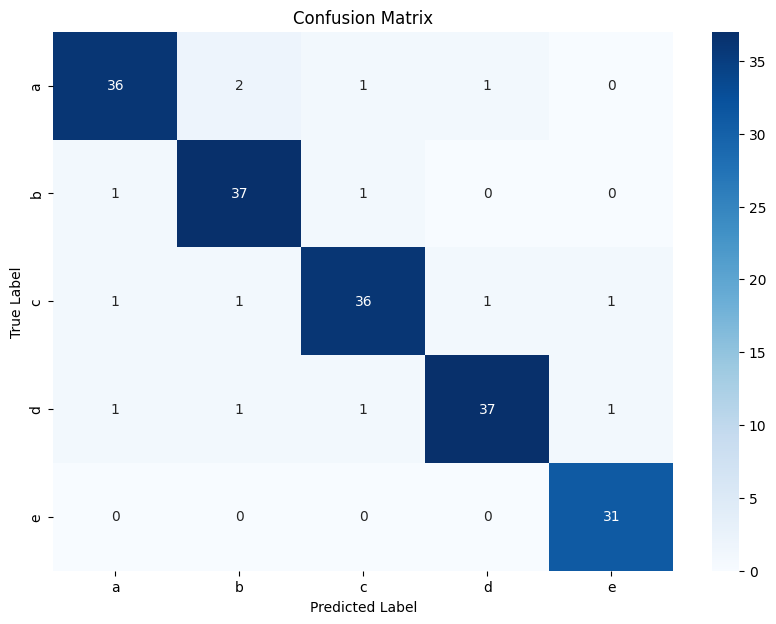


Misclassification Rates:
True: a, Predicted: b -> Rate: 0.07
True: a, Predicted: c -> Rate: 0.04
True: a, Predicted: d -> Rate: 0.00
True: a, Predicted: e -> Rate: 0.00
True: b, Predicted: a -> Rate: 0.11
True: b, Predicted: c -> Rate: 0.00
True: b, Predicted: d -> Rate: 0.00
True: b, Predicted: e -> Rate: 0.00
True: c, Predicted: a -> Rate: 0.05
True: c, Predicted: b -> Rate: 0.02
True: c, Predicted: d -> Rate: 0.00
True: c, Predicted: e -> Rate: 0.02
True: d, Predicted: a -> Rate: 0.02
True: d, Predicted: b -> Rate: 0.00
True: d, Predicted: c -> Rate: 0.05
True: d, Predicted: e -> Rate: 0.02
True: e, Predicted: a -> Rate: 0.00
True: e, Predicted: b -> Rate: 0.00
True: e, Predicted: c -> Rate: 0.00
True: e, Predicted: d -> Rate: 0.00


In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(mean_confusion_matrix_rounded, annot=True, fmt='d', cmap='Blues', xticklabels=train_df['label'].unique(), yticklabels=train_df['label'].unique())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
# Quantitative Analysis: Calculate misclassification rates
misclassifications = {}
labels =['a','b','c','d','e']
for i, true_label in enumerate(labels):
    for j, pred_label in enumerate(labels):
        if i != j:
            misclassifications[(true_label, pred_label)] = conf_matrix[i, j] / conf_matrix[i].sum()

# Print misclassification rates
print("\nMisclassification Rates:")
for (true_label, pred_label), rate in misclassifications.items():
    print(f"True: {true_label}, Predicted: {pred_label} -> Rate: {rate:.2f}")

           Average
Precision    0.926
Recall       0.924
F1-score     0.924


<ipython-input-177-490111ec79fc>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=averages_df_percentage.index, y='Average', data=averages_df_percentage, palette=colors)


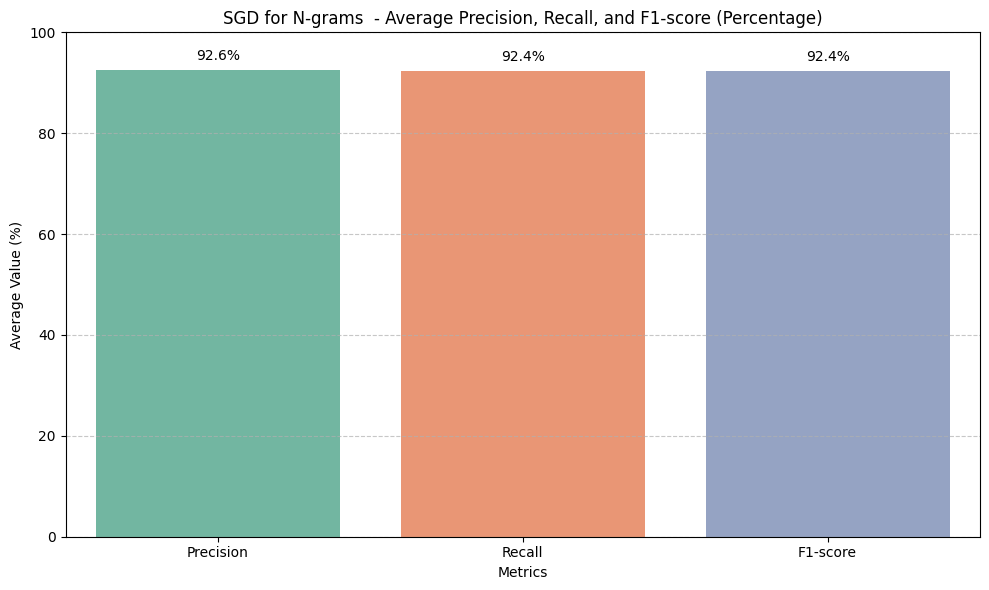

In [ ]:
generateAveragePlot(results15_df,"SGD for N-grams ")

Classification XG Boost for BoW

In [ ]:
accuracy_scores = []
classification_reports = []
confusion_matrices = []
for train_index, test_index in kf.split(df):
    train_df, test_df = df.iloc[train_index], df.iloc[test_index]
    X_train_bow, X_test_bow = bowDataSet(train_df, test_df)

    # Initialize the LabelEncoder
    le = LabelEncoder()

    # Encode the labels in the training and testing data
    y_train_encoded = le.fit_transform(train_df['label'])
    y_test_encoded = le.transform(test_df['label'])

    # Initialize the XGBoost classifier
    xgb_classifier_bow = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

    # Fit the classifier on the training data using BoW features
    xgb_classifier_bow.fit(X_train_bow, y_train_encoded)

    # Predict on the test data using BoW features
    y_pred_bow_xgb = xgb_classifier_bow.predict(X_test_bow)

    # Calculate accuracy
    accuracy_xgb_bow = accuracy_score(y_test_encoded, y_pred_bow_xgb)
    accuracy_scores.append(accuracy_xgb_bow)

    ## Store the classification report
    classification_rep = classification_report(y_test_encoded, y_pred_bow_xgb, output_dict=True)
    classification_reports.append(classification_rep)

    # Store the confusion matrix
    conf_matrix = confusion_matrix(y_test_encoded, y_pred_bow_xgb)
    confusion_matrices.append(conf_matrix)

# Calculate mean accuracy and round it
mean_accuracy = np.mean(accuracy_scores)
mean_accuracy_rounded = round(mean_accuracy, 2)
print("Mean Accuracy:", mean_accuracy_rounded)

# Calculate mean classification report and round metrics
mean_classification_report = {}
for cls in classification_reports[0].keys():
    if cls not in ['accuracy', 'macro avg', 'weighted avg']:
        precision = np.mean([report[cls]['precision'] for report in classification_reports])
        recall = np.mean([report[cls]['recall'] for report in classification_reports])
        f1_score = np.mean([report[cls]['f1-score'] for report in classification_reports])
        mean_classification_report[cls] = {
            'Precision': round(precision, 2),
            'Recall': round(recall, 2),
            'F1-score': round(f1_score, 2)
        }
results16_df = pd.DataFrame.from_dict(mean_classification_report, orient='index')
print("\nMean XGBoost Classification Report for BoW:\n", results16_df)

# Calculate mean confusion matrix and round it
mean_confusion_matrix = np.mean(confusion_matrices, axis=0)
mean_confusion_matrix_rounded = np.round(mean_confusion_matrix).astype(int)
print("\nMean Confusion Matrix:\n", mean_confusion_matrix_rounded)

BoW Training DataFrame shape: (1720, 19896)
BoW Testing DataFrame shape: (192, 19896)
BoW Training DataFrame shape: (1720, 20141)
BoW Testing DataFrame shape: (192, 20141)
BoW Training DataFrame shape: (1721, 19924)
BoW Testing DataFrame shape: (191, 19924)
BoW Training DataFrame shape: (1721, 20036)
BoW Testing DataFrame shape: (191, 20036)
BoW Training DataFrame shape: (1721, 20037)
BoW Testing DataFrame shape: (191, 20037)
BoW Training DataFrame shape: (1721, 20085)
BoW Testing DataFrame shape: (191, 20085)
BoW Training DataFrame shape: (1721, 19898)
BoW Testing DataFrame shape: (191, 19898)
BoW Training DataFrame shape: (1721, 20176)
BoW Testing DataFrame shape: (191, 20176)
BoW Training DataFrame shape: (1721, 20065)
BoW Testing DataFrame shape: (191, 20065)
BoW Training DataFrame shape: (1721, 19885)
BoW Testing DataFrame shape: (191, 19885)
Mean Accuracy: 0.9

Mean XGBoost Classification Report for BoW:
    Precision  Recall  F1-score
0       0.86    0.88      0.87
1       0.90 

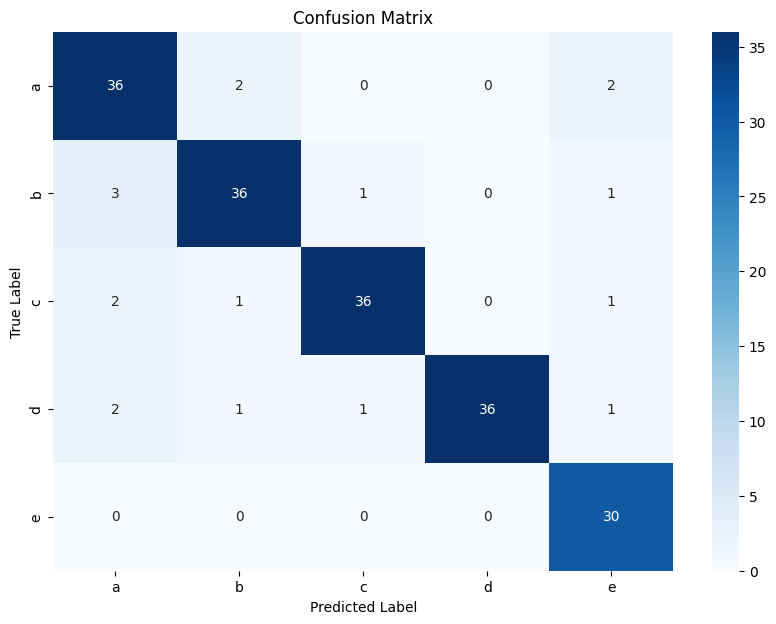


Misclassification Rates:
True: a, Predicted: b -> Rate: 0.02
True: a, Predicted: c -> Rate: 0.02
True: a, Predicted: d -> Rate: 0.02
True: a, Predicted: e -> Rate: 0.02
True: b, Predicted: a -> Rate: 0.05
True: b, Predicted: c -> Rate: 0.00
True: b, Predicted: d -> Rate: 0.00
True: b, Predicted: e -> Rate: 0.03
True: c, Predicted: a -> Rate: 0.02
True: c, Predicted: b -> Rate: 0.07
True: c, Predicted: d -> Rate: 0.00
True: c, Predicted: e -> Rate: 0.02
True: d, Predicted: a -> Rate: 0.05
True: d, Predicted: b -> Rate: 0.00
True: d, Predicted: c -> Rate: 0.02
True: d, Predicted: e -> Rate: 0.05
True: e, Predicted: a -> Rate: 0.00
True: e, Predicted: b -> Rate: 0.00
True: e, Predicted: c -> Rate: 0.08
True: e, Predicted: d -> Rate: 0.00


In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(mean_confusion_matrix_rounded, annot=True, fmt='d', cmap='Blues', xticklabels=train_df['label'].unique(), yticklabels=train_df['label'].unique())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
# Quantitative Analysis: Calculate misclassification rates
misclassifications = {}
labels =['a','b','c','d','e']
for i, true_label in enumerate(labels):
    for j, pred_label in enumerate(labels):
        if i != j:
            misclassifications[(true_label, pred_label)] = conf_matrix[i, j] / conf_matrix[i].sum()

# Print misclassification rates
print("\nMisclassification Rates:")
for (true_label, pred_label), rate in misclassifications.items():
    print(f"True: {true_label}, Predicted: {pred_label} -> Rate: {rate:.2f}")

           Average
Precision    0.902
Recall       0.906
F1-score     0.900


<ipython-input-177-490111ec79fc>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=averages_df_percentage.index, y='Average', data=averages_df_percentage, palette=colors)


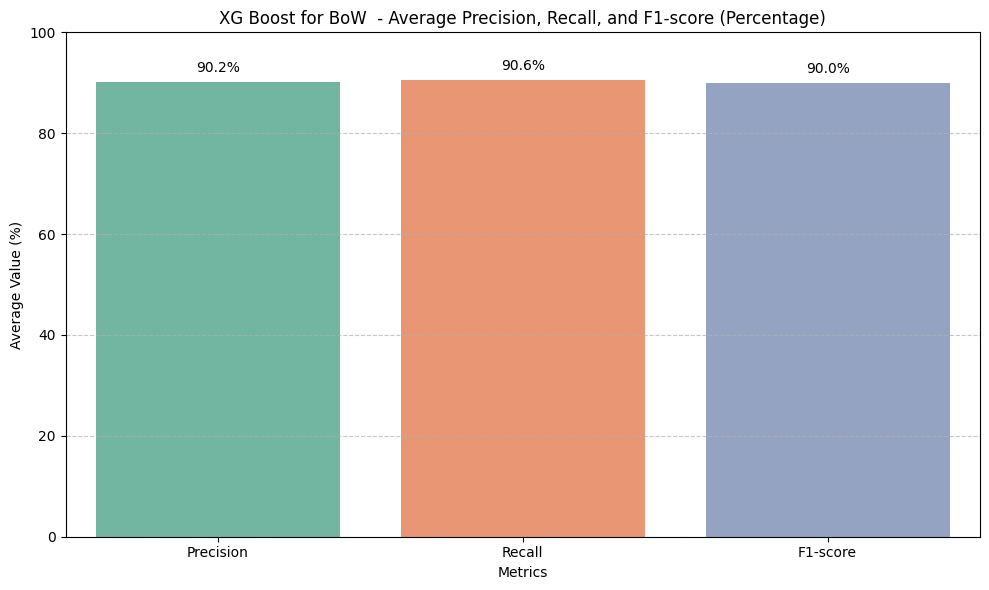

In [ ]:
generateAveragePlot(results16_df,"XG Boost for BoW ")

Classification XG Boost for TF - ID

In [ ]:
accuracy_scores = []
classification_reports = []
confusion_matrices = []

for train_index, test_index in kf.split(df):
    train_df, test_df = df.iloc[train_index], df.iloc[test_index]
    X_train_tfidf, X_test_tfidf = TFIDFDataSet(train_df, test_df)

    # Initialize the LabelEncoder
    le = LabelEncoder()

    # Encode the labels in the training and testing data
    y_train_encoded = le.fit_transform(train_df['label'])
    y_test_encoded = le.transform(test_df['label'])

    # Initialize the XGBoost classifier
    xgb_classifier_tfidf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

    # Fit the classifier on the training data using TF-IDF features
    xgb_classifier_tfidf.fit(X_train_tfidf, y_train_encoded)

    # Predict on the test data using TF-IDF features
    y_pred_tfidf_xgb = xgb_classifier_tfidf.predict(X_test_tfidf)

    # Calculate accuracy
    accuracy_xgb_tfidf = accuracy_score(y_test_encoded, y_pred_tfidf_xgb)
    accuracy_scores.append(accuracy_xgb_tfidf)

    ## Store the classification report
    classification_rep = classification_report(y_test_encoded, y_pred_tfidf_xgb, output_dict=True)
    classification_reports.append(classification_rep)

    # Store the confusion matrix
    conf_matrix = confusion_matrix(y_test_encoded, y_pred_tfidf_xgb)
    confusion_matrices.append(conf_matrix)


# Calculate mean accuracy and round it
mean_accuracy = np.mean(accuracy_scores)
mean_accuracy_rounded = round(mean_accuracy, 2)
print("Mean Accuracy:", mean_accuracy_rounded)

# Calculate mean classification report and round metrics
mean_classification_report = {}
for cls in classification_reports[0].keys():
    if cls not in ['accuracy', 'macro avg', 'weighted avg']:
        precision = np.mean([report[cls]['precision'] for report in classification_reports])
        recall = np.mean([report[cls]['recall'] for report in classification_reports])
        f1_score = np.mean([report[cls]['f1-score'] for report in classification_reports])
        mean_classification_report[cls] = {
            'Precision': round(precision, 2),
            'Recall': round(recall, 2),
            'F1-score': round(f1_score, 2)
        }
results17_df = pd.DataFrame.from_dict(mean_classification_report, orient='index')
print("\nMean XGBoost Classification Report for TFIDF:\n", results17_df)

# Calculate mean confusion matrix and round it
mean_confusion_matrix = np.mean(confusion_matrices, axis=0)
mean_confusion_matrix_rounded = np.round(mean_confusion_matrix).astype(int)
print("\nMean Confusion Matrix:\n", mean_confusion_matrix_rounded)

TF-IDF Training DataFrame shape: (1720, 19896)
TF-IDF Testing DataFrame shape: (192, 19896)
TF-IDF Training DataFrame shape: (1720, 20141)
TF-IDF Testing DataFrame shape: (192, 20141)
TF-IDF Training DataFrame shape: (1721, 19924)
TF-IDF Testing DataFrame shape: (191, 19924)
TF-IDF Training DataFrame shape: (1721, 20036)
TF-IDF Testing DataFrame shape: (191, 20036)
TF-IDF Training DataFrame shape: (1721, 20037)
TF-IDF Testing DataFrame shape: (191, 20037)
TF-IDF Training DataFrame shape: (1721, 20085)
TF-IDF Testing DataFrame shape: (191, 20085)
TF-IDF Training DataFrame shape: (1721, 19898)
TF-IDF Testing DataFrame shape: (191, 19898)
TF-IDF Training DataFrame shape: (1721, 20176)
TF-IDF Testing DataFrame shape: (191, 20176)
TF-IDF Training DataFrame shape: (1721, 20065)
TF-IDF Testing DataFrame shape: (191, 20065)
TF-IDF Training DataFrame shape: (1721, 19885)
TF-IDF Testing DataFrame shape: (191, 19885)
Mean Accuracy: 0.9

Mean XGBoost Classification Report for TFIDF:
    Precision 

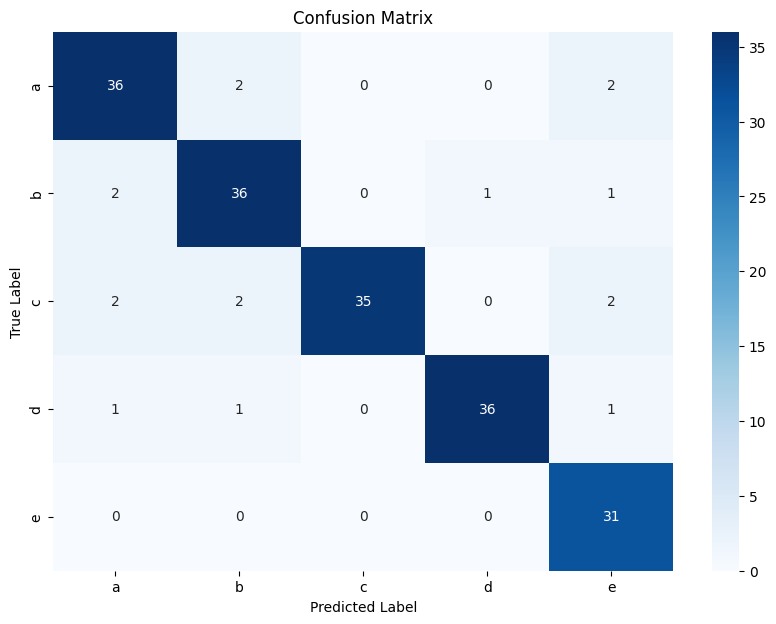


Misclassification Rates:
True: a, Predicted: b -> Rate: 0.04
True: a, Predicted: c -> Rate: 0.00
True: a, Predicted: d -> Rate: 0.00
True: a, Predicted: e -> Rate: 0.04
True: b, Predicted: a -> Rate: 0.03
True: b, Predicted: c -> Rate: 0.00
True: b, Predicted: d -> Rate: 0.00
True: b, Predicted: e -> Rate: 0.03
True: c, Predicted: a -> Rate: 0.05
True: c, Predicted: b -> Rate: 0.05
True: c, Predicted: d -> Rate: 0.02
True: c, Predicted: e -> Rate: 0.07
True: d, Predicted: a -> Rate: 0.05
True: d, Predicted: b -> Rate: 0.00
True: d, Predicted: c -> Rate: 0.02
True: d, Predicted: e -> Rate: 0.05
True: e, Predicted: a -> Rate: 0.00
True: e, Predicted: b -> Rate: 0.00
True: e, Predicted: c -> Rate: 0.00
True: e, Predicted: d -> Rate: 0.00


In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(mean_confusion_matrix_rounded, annot=True, fmt='d', cmap='Blues', xticklabels=train_df['label'].unique(), yticklabels=train_df['label'].unique())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
# Quantitative Analysis: Calculate misclassification rates
misclassifications = {}
labels =['a','b','c','d','e']
for i, true_label in enumerate(labels):
    for j, pred_label in enumerate(labels):
        if i != j:
            misclassifications[(true_label, pred_label)] = conf_matrix[i, j] / conf_matrix[i].sum()

# Print misclassification rates
print("\nMisclassification Rates:")
for (true_label, pred_label), rate in misclassifications.items():
    print(f"True: {true_label}, Predicted: {pred_label} -> Rate: {rate:.2f}")

           Average
Precision    0.904
Recall       0.908
F1-score     0.904


<ipython-input-177-490111ec79fc>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=averages_df_percentage.index, y='Average', data=averages_df_percentage, palette=colors)


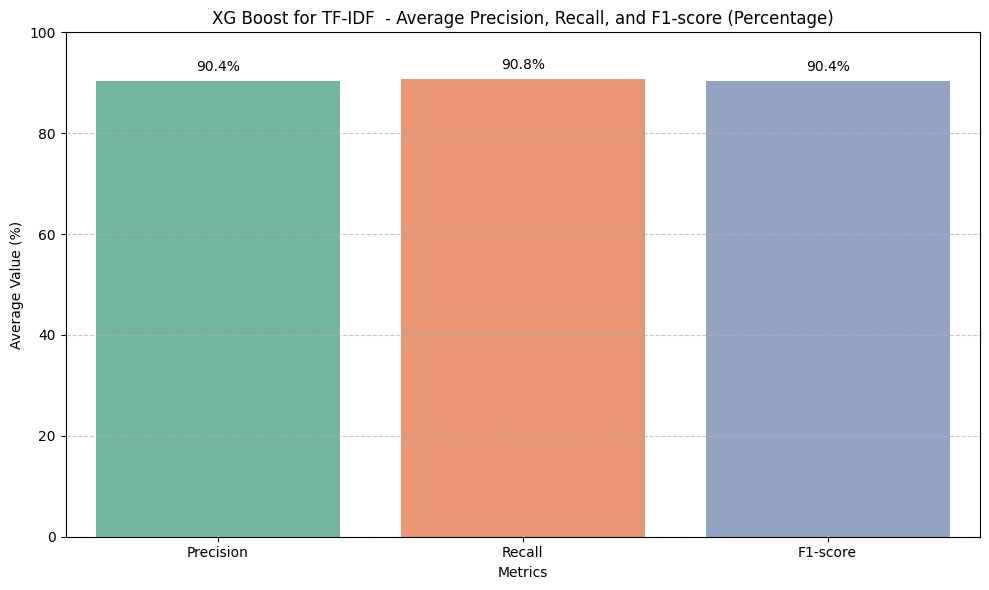

In [ ]:
generateAveragePlot(results17_df,"XG Boost for TF-IDF ")

Classification XG Boost for N - Grams

In [ ]:
accuracy_scores = []
classification_reports = []
confusion_matrices = []

for train_index, test_index in kf.split(df):
    train_df, test_df = df.iloc[train_index], df.iloc[test_index]
    X_train_ngrams, X_test_ngrams = NgramsDataSet(train_df, test_df)

    # Initialize the LabelEncoder
    le = LabelEncoder()

    # Encode the labels in the training and testing data
    y_train_encoded = le.fit_transform(train_df['label'])
    y_test_encoded = le.transform(test_df['label'])

    # Initialize the XGBoost classifier
    xgb_classifier_ngrams = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

    # Fit the classifier on the training data using TF-IDF features
    xgb_classifier_ngrams.fit(X_train_ngrams, y_train_encoded)

    # Predict on the test data using TF-IDF features
    y_pred_ngrams_xgb = xgb_classifier_ngrams.predict(X_test_ngrams)

    # Calculate accuracy
    accuracy_xgb_ngrams = accuracy_score(y_test_encoded, y_pred_ngrams_xgb)
    accuracy_scores.append(accuracy_xgb_ngrams)

    ## Store the classification report
    classification_rep = classification_report(y_test_encoded, y_pred_ngrams_xgb, output_dict=True)
    classification_reports.append(classification_rep)

    # Store the confusion matrix
    conf_matrix = confusion_matrix(y_test_encoded, y_pred_ngrams_xgb)
    confusion_matrices.append(conf_matrix)

# Calculate mean accuracy and round it
mean_accuracy = np.mean(accuracy_scores)
mean_accuracy_rounded = round(mean_accuracy, 2)
print("Mean Accuracy:", mean_accuracy_rounded)

# Calculate mean classification report and round metrics
mean_classification_report = {}
for cls in classification_reports[0].keys():
    if cls not in ['accuracy', 'macro avg', 'weighted avg']:
        precision = np.mean([report[cls]['precision'] for report in classification_reports])
        recall = np.mean([report[cls]['recall'] for report in classification_reports])
        f1_score = np.mean([report[cls]['f1-score'] for report in classification_reports])
        mean_classification_report[cls] = {
            'Precision': round(precision, 2),
            'Recall': round(recall, 2),
            'F1-score': round(f1_score, 2)
        }
results18_df = pd.DataFrame.from_dict(mean_classification_report, orient='index')
print("\nMean XGBoost Classification Report for  N-grams:\n", results18_df)

# Calculate mean confusion matrix and round it
mean_confusion_matrix = np.mean(confusion_matrices, axis=0)
mean_confusion_matrix_rounded = np.round(mean_confusion_matrix).astype(int)
print("\nMean Confusion Matrix:\n", mean_confusion_matrix_rounded)

Shape of X_train_ngrams: (1720, 84996)
Shape of X_test_ngrams: (192, 84996)
Shape of X_train_ngrams: (1720, 85345)
Shape of X_test_ngrams: (192, 85345)
Shape of X_train_ngrams: (1721, 85151)
Shape of X_test_ngrams: (191, 85151)
Shape of X_train_ngrams: (1721, 85080)
Shape of X_test_ngrams: (191, 85080)
Shape of X_train_ngrams: (1721, 85303)
Shape of X_test_ngrams: (191, 85303)
Shape of X_train_ngrams: (1721, 84928)
Shape of X_test_ngrams: (191, 84928)
Shape of X_train_ngrams: (1721, 85128)
Shape of X_test_ngrams: (191, 85128)
Shape of X_train_ngrams: (1721, 85682)
Shape of X_test_ngrams: (191, 85682)
Shape of X_train_ngrams: (1721, 84962)
Shape of X_test_ngrams: (191, 84962)
Shape of X_train_ngrams: (1721, 84555)
Shape of X_test_ngrams: (191, 84555)
Mean Accuracy: 0.91

Mean XGBoost Classification Report for  N-grams:
    Precision  Recall  F1-score
0       0.87    0.89      0.88
1       0.87    0.89      0.88
2       0.95    0.88      0.92
3       0.96    0.91      0.93
4       0.89  

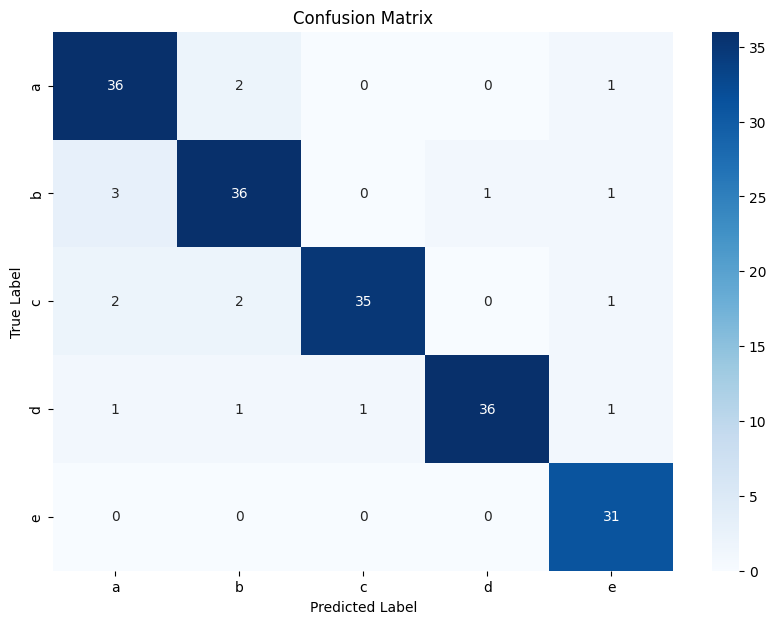


Misclassification Rates:
True: a, Predicted: b -> Rate: 0.07
True: a, Predicted: c -> Rate: 0.02
True: a, Predicted: d -> Rate: 0.00
True: a, Predicted: e -> Rate: 0.02
True: b, Predicted: a -> Rate: 0.08
True: b, Predicted: c -> Rate: 0.00
True: b, Predicted: d -> Rate: 0.00
True: b, Predicted: e -> Rate: 0.00
True: c, Predicted: a -> Rate: 0.10
True: c, Predicted: b -> Rate: 0.02
True: c, Predicted: d -> Rate: 0.00
True: c, Predicted: e -> Rate: 0.02
True: d, Predicted: a -> Rate: 0.05
True: d, Predicted: b -> Rate: 0.00
True: d, Predicted: c -> Rate: 0.02
True: d, Predicted: e -> Rate: 0.02
True: e, Predicted: a -> Rate: 0.00
True: e, Predicted: b -> Rate: 0.00
True: e, Predicted: c -> Rate: 0.00
True: e, Predicted: d -> Rate: 0.00


In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(mean_confusion_matrix_rounded, annot=True, fmt='d', cmap='Blues', xticklabels=train_df['label'].unique(), yticklabels=train_df['label'].unique())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
# Quantitative Analysis: Calculate misclassification rates
misclassifications = {}
labels =['a','b','c','d','e']
for i, true_label in enumerate(labels):
    for j, pred_label in enumerate(labels):
        if i != j:
            misclassifications[(true_label, pred_label)] = conf_matrix[i, j] / conf_matrix[i].sum()

# Print misclassification rates
print("\nMisclassification Rates:")
for (true_label, pred_label), rate in misclassifications.items():
    print(f"True: {true_label}, Predicted: {pred_label} -> Rate: {rate:.2f}")

           Average
Precision    0.908
Recall       0.912
F1-score     0.908


<ipython-input-177-490111ec79fc>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=averages_df_percentage.index, y='Average', data=averages_df_percentage, palette=colors)


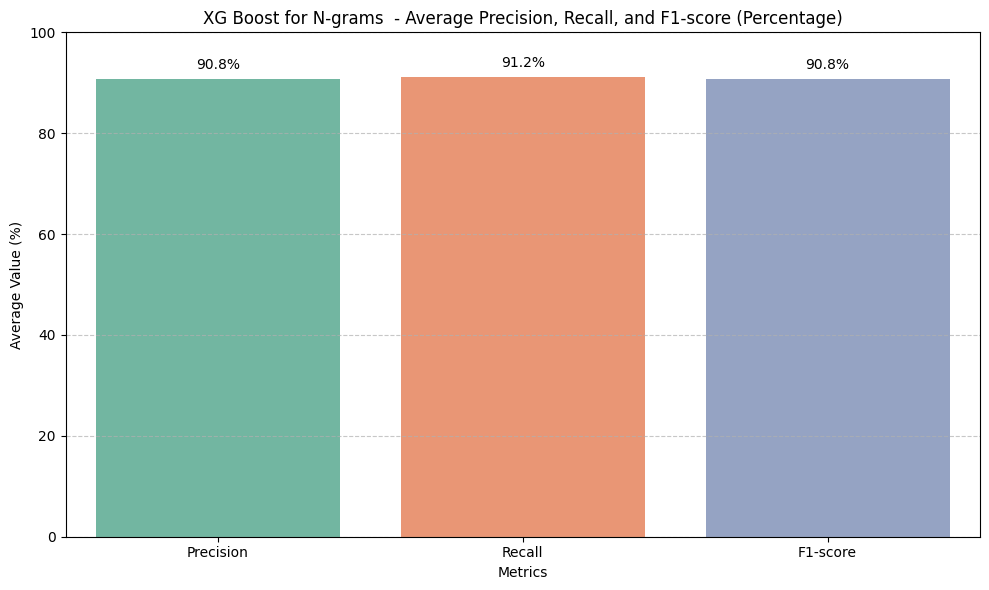

In [ ]:
generateAveragePlot(results18_df,"XG Boost for N-grams ")

### BERT

In [ ]:
pip install transformers torch

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import DataLoader, Dataset
import torch
from sklearn.model_selection import KFold

In [ ]:
# Encode the labels
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])


In [ ]:
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }


In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=5)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def prepare_dataloader(df, tokenizer, max_len, batch_size):
    dataset = TextDataset(
        texts=df['text_clean'].tolist(),
        labels=df['label'].tolist(),
        tokenizer=tokenizer,
        max_len=max_len
    )
    return DataLoader(dataset, batch_size=batch_size, num_workers=4)

In [ ]:
pip install transformers[torch]

In [ ]:
from transformers import TrainingArguments
from transformers import Trainer

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into 80% for training and 20% for testing
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Prepare dataloaders for training and testing
train_dataloader = prepare_dataloader(train_df, tokenizer, max_len=128, batch_size=16)
test_dataloader = prepare_dataloader(test_df, tokenizer, max_len=128, batch_size=16)

# Use Trainer for training
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataloader.dataset,
    eval_dataset=test_dataloader.dataset,  # Using test dataset for evaluation
    tokenizer=tokenizer,
)

trainer.train()
trainer.evaluate()


Step,Training Loss
10,0.881100
20,0.963000
30,0.794600
40,0.819800
50,0.812400
60,0.748800
70,0.677600
80,0.642900
90,0.520000


{'eval_loss': 0.43352776765823364,
 'eval_runtime': 167.2958,
 'eval_samples_per_second': 2.289,
 'eval_steps_per_second': 0.143,
 'epoch': 1.0}

In [ ]:
# Obtain predictions on the test set
predictions = trainer.predict(test_dataloader.dataset)

# Get predicted labels and true labels
pred_labels = np.argmax(predictions.predictions, axis=1)
true_labels = predictions.label_ids

# Generate the classification report
report = classification_report(true_labels, pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.94      0.85        70
           1       0.94      0.74      0.83        88
           2       0.99      0.82      0.90        94
           3       0.83      0.93      0.88        70
           4       0.84      1.00      0.91        61

    accuracy                           0.87       383
   macro avg       0.87      0.89      0.87       383
weighted avg       0.89      0.87      0.87       383



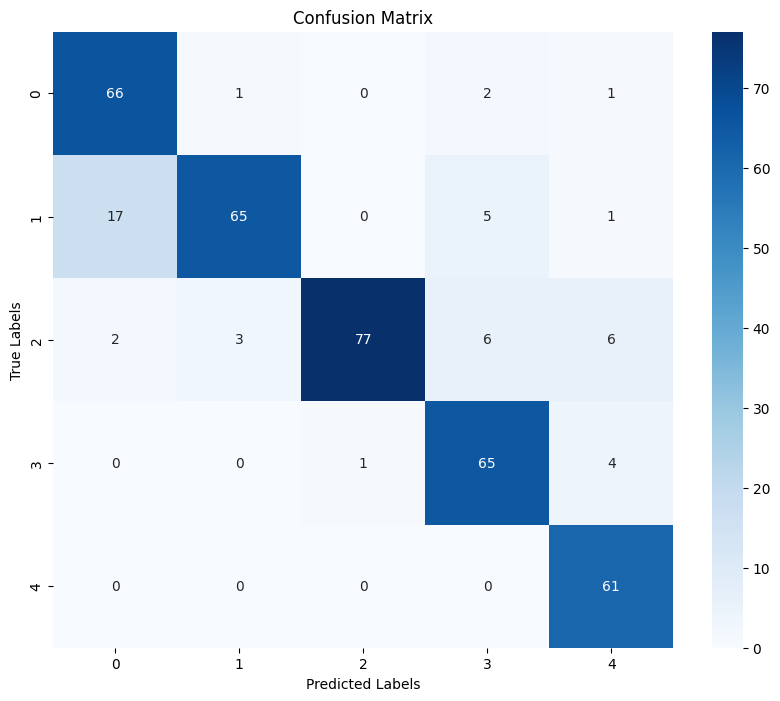

Misclassified instances:
                     author  label  \
530         Agatha Christie      2   
1192         Wilkie Collins      1   
730   Mary Roberts Rinehart      3   
1067     Arthur Conan Doyle      0   
1285         Wilkie Collins      1   
324          Wilkie Collins      1   
555         Agatha Christie      2   
382          Wilkie Collins      1   
1350         Wilkie Collins      1   
1512        Agatha Christie      2   
1301         Wilkie Collins      1   
1525        Agatha Christie      2   
1497        Agatha Christie      2   
322          Wilkie Collins      1   
1380        Agatha Christie      2   
755   Mary Roberts Rinehart      3   
710   Mary Roberts Rinehart      3   
1307         Wilkie Collins      1   
527         Agatha Christie      2   
425         Agatha Christie      2   
303          Wilkie Collins      1   
429         Agatha Christie      2   
1516        Agatha Christie      2   
765   Mary Roberts Rinehart      3   
270          Wilkie Colli

In [ ]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(true_labels, pred_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(true_labels), yticklabels=np.unique(true_labels))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Error Analysis: Identify misclassified instances
misclassified_indices = np.where(pred_labels != true_labels)[0]
misclassified_samples = test_df.iloc[misclassified_indices]

# Display misclassified instances
print("Misclassified instances:")
print(misclassified_samples)

# **Champion Model - Naives bayes with ngrams wins. It has the highest F1 Score (95.6 %) and Accuracy (96%) among all other models. **